## House Price Prediction using Ridge and Lasso regression

#### Assignment Part-I
A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values and 
flip them on at a higher price. For the same purpose, the company has collected a data set 
from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. 
You are required to build a regression model using regularisation in order to 
predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## 1. Importing and understanding the data

In [1]:
# Importing important libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Reading csv file with dataframe Housing

Housing = pd.read_csv('train.csv')

Housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Checking dimensions of Housing dataset

print('Housing dataset contains,')
print(f'Rows : {Housing.shape[0]}')
print(f'Columns : {Housing.shape[1]}')

Housing dataset contains,
Rows : 1460
Columns : 81


In [4]:
# Checking column wise information 

Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Checking Numerical attributes of numerical columns

Housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Replacing values w.r.t. data dictionary

Housing['MSSubClass'] = Housing['MSSubClass'].replace([20,60,50,120,160,80,70,30,
                                                       90,190,85,75,40,45,150,180],
                                                                    ['1-STORY 1946 & NEWER ALL STYLES',
                                                                    '2-STORY 1946 & NEWER',
                                                                    '1-1/2 STORY FINISHED ALL AGES',
                                                                    '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                                                    '2-STORY PUD - 1946 & NEWER',
                                                                    'SPLIT OR MULTI-LEVEL','2-STORY 1945 & OLDER',
                                                                    '1-STORY 1945 & OLDER',
                                                                    'DUPLEX - ALL STYLES AND AGES',
                                                                    '2 FAMILY CONVERSION - ALL STYLES AND AGES',
                                                                    'SPLIT FOYER',
                                                                    '2-1/2 STORY ALL AGES',
                                                                    '1-STORY W/FINISHED ATTIC ALL AGES',
                                                                    '1-1/2 STORY - UNFINISHED ALL AGES',
                                                                    '1-1/2 STORY PUD - ALL AGES',
                                                                    'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'])

Housing['MoSold'] = Housing['MoSold'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
                                              ['Jan','Feb','Mar','Apr',
                                               'May','Jun','Jul','Aug',
                                               'Sep','Oct','Nov','Dec'])

In [7]:
print('Total int columns are : ',len(Housing.select_dtypes(exclude = ['object','float']).columns))

Total int columns are :  33


In [8]:
print('Total float columns are : ',len(Housing.select_dtypes(exclude = ['object','int64']).columns))

Total float columns are :  3


In [9]:
print('Total object columns are : ',len(Housing.select_dtypes(include = 'object').columns))

Total object columns are :  45


In [10]:
Housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,Feb,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,May,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,Sep,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,Feb,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,Dec,2008,WD,Normal,250000


In [11]:
# Checking missing values

(Housing.isnull().sum()).sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [12]:
# Checking missing percentages w.r.t. length of dataframe

100*((Housing.isnull().sum()).sort_values(ascending = False).head(20))/len(Housing)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Utilities        0.000000
dtype: float64

##### Dropping missing values above 40%. 

__So dropping columns :__ = `PoolQc, MiscFeature, Alley, Fence, FireplaceQu`

In [13]:
# Dropping columns whose missing value above 40%

# Housing = Housing.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1)

Housing = Housing.loc[:,(Housing.isnull().sum())/len(Housing) < 0.4]


In [14]:
# Checking Housing dataframe

Housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,Feb,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,May,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,Sep,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,Feb,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,Dec,2008,WD,Normal,250000


In [15]:
# Checking missing value again

100*((Housing.isnull().sum()).sort_values(ascending = False).head(15))/len(Housing)

LotFrontage     17.739726
GarageFinish     5.547945
GarageType       5.547945
GarageCond       5.547945
GarageQual       5.547945
GarageYrBlt      5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
RoofStyle        0.000000
dtype: float64

## 2. Missing value Treatment

### 2.1 Missing value treatment for Column : `LotFrontage`

In [16]:
Housing['LotFrontage'].isnull().sum()

259

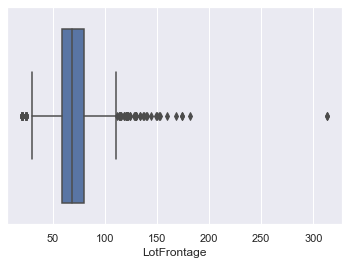

In [17]:
# Plotting boxplot

sns.boxplot(Housing['LotFrontage'], data = Housing)
plt.show()

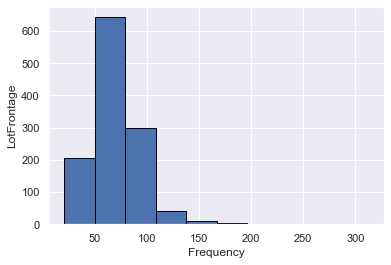

In [18]:
# Plotting Histogram for column 'LotFrontage'

plt.hist(Housing['LotFrontage'], edgecolor = 'black')
plt.xlabel('Frequency')
plt.ylabel('LotFrontage')
plt.show()

In [19]:
# Imputing missing values with median value, as we have outliers in the column 'LotFrontage'

med_LotFrontage = Housing['LotFrontage'].median()
med_LotFrontage

69.0

In [20]:
Housing['LotFrontage'] = Housing['LotFrontage'].replace(np.nan, med_LotFrontage)

In [21]:
Housing['LotFrontage'].isnull().sum()

0

### 2.2 Missing value treatment for Column : `GarageFinish`

In [22]:
Housing['GarageFinish'].isnull().sum()

81

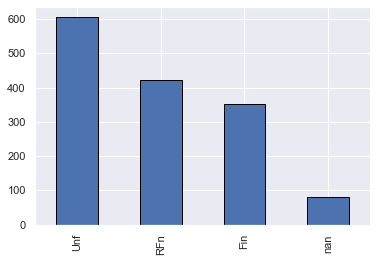

In [23]:
Housing['GarageFinish'].value_counts(dropna =False).plot(kind = 'bar', edgecolor = 'black')

In [24]:
100*(Housing['GarageFinish'].value_counts(dropna =False)/len(Housing['GarageFinish']))

Unf    41.438356
RFn    28.904110
Fin    24.109589
NaN     5.547945
Name: GarageFinish, dtype: float64

In [25]:
# Here NaN value Represents No Garage, repalceing Nan values with No_Garage

Housing['GarageFinish'] = Housing['GarageFinish'].replace(np.nan,'NA')

In [26]:
Housing['GarageFinish'].isnull().sum()

0

### 2.3 Missing value treatment for Column : `GarageType`

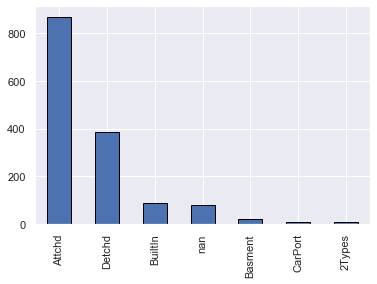

In [27]:
Housing['GarageType'].value_counts(dropna = False).plot(kind = 'bar', edgecolor = 'black')
plt.show()

In [28]:
100*(Housing['GarageType'].value_counts(dropna =False)/len(Housing['GarageType']))

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
NaN         5.547945
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64

In [29]:
# Here NaN value Represents No Garage, repalceing Nan values with No_Garage

Housing['GarageType'] = Housing['GarageType'].replace(np.nan, 'NA')

In [30]:
Housing['GarageFinish'].isnull().sum()

0

### 2.4 Missing value treatment for Column : `GarageCond`

In [31]:
Housing['GarageCond'].isnull().sum()

81

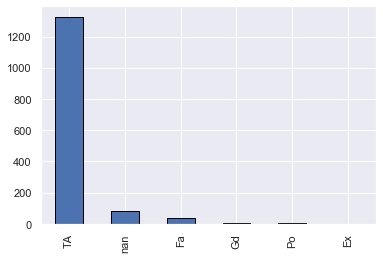

In [32]:
Housing['GarageCond'].value_counts(dropna = False).plot(kind = 'bar', edgecolor = 'black')
plt.show()

In [33]:
100*(Housing['GarageCond'].value_counts(dropna =False)/len(Housing['GarageCond']))

TA     90.821918
NaN     5.547945
Fa      2.397260
Gd      0.616438
Po      0.479452
Ex      0.136986
Name: GarageCond, dtype: float64

In [34]:
# Here Dropping column 'GarageCond' as 95% of infomation is defined by level 'TA' and missing values

Housing = Housing.drop('GarageCond', axis = 1)

In [35]:
Housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,Y,0,61,0,0,0,0,0,Feb,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,Y,298,0,0,0,0,0,0,May,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,Y,0,42,0,0,0,0,0,Sep,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,Y,0,35,272,0,0,0,0,Feb,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,Y,192,84,0,0,0,0,0,Dec,2008,WD,Normal,250000


### 2.5 Missing value treatment for Column : `GarageQual`

In [36]:
Housing['GarageQual'].isnull().sum()

81

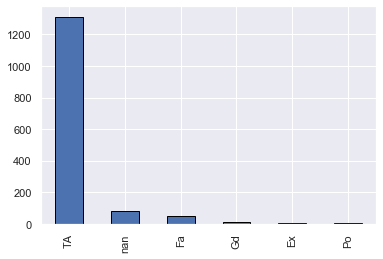

In [37]:
Housing['GarageQual'].value_counts(dropna = False).plot(kind = 'bar', edgecolor = 'black')
plt.show()

In [38]:
100*(Housing['GarageQual'].value_counts(dropna= False)/len(Housing))

TA     89.794521
NaN     5.547945
Fa      3.287671
Gd      0.958904
Ex      0.205479
Po      0.205479
Name: GarageQual, dtype: float64

In [39]:
# Here Dropping column 'GarageQual' as 95% of infomation is defined by level 'TA' and missing values

Housing = Housing.drop('GarageQual', axis = 1)

In [40]:
Housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,Y,0,61,0,0,0,0,0,Feb,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,Y,298,0,0,0,0,0,0,May,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,Y,0,42,0,0,0,0,0,Sep,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,Y,0,35,272,0,0,0,0,Feb,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,Y,192,84,0,0,0,0,0,Dec,2008,WD,Normal,250000


### 2.6 Missing value treatment for Column : `GarageYrBlt`

In [41]:
Housing['GarageYrBlt'].isnull().sum()

81

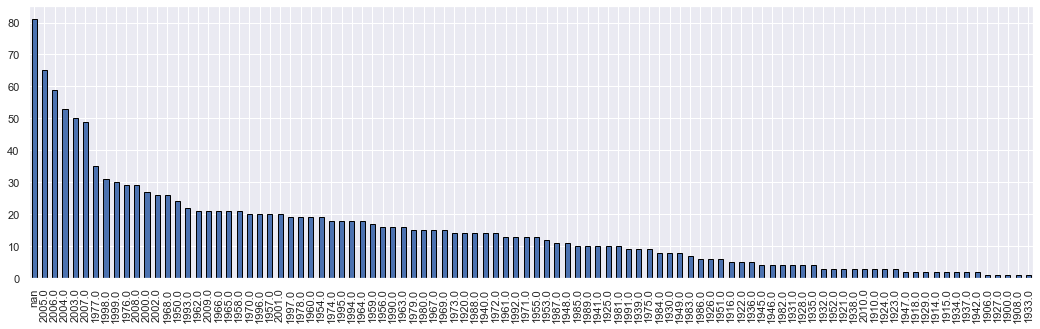

In [42]:
plt.figure(figsize = (18,5))
Housing['GarageYrBlt'].value_counts(dropna = False).plot(kind = 'bar', edgecolor = 'black')
plt.show()

In [43]:
# Considering column GarageFinish and GarageType we can say that missing values denotes No Garage, 
# so replacing missing values with '0'

Housing['GarageYrBlt'] = Housing['GarageYrBlt'].replace(np.nan, 0)

In [44]:
Housing['GarageYrBlt'].isnull().sum()

0

### 2.7 Missing value treatment for Column : `BsmtExposure`

In [45]:
Housing['BsmtExposure'].isnull().sum()

38

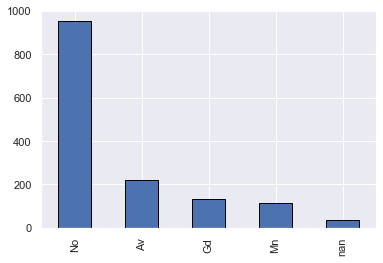

In [46]:
Housing['BsmtExposure'].value_counts(dropna= False).plot(kind = 'bar', edgecolor = 'black')
plt.show()

In [47]:
100*(Housing['BsmtExposure'].value_counts(dropna= False)/len(Housing))

No     65.273973
Av     15.136986
Gd      9.178082
Mn      7.808219
NaN     2.602740
Name: BsmtExposure, dtype: float64

In [48]:
# Here NaN value Represents No basement, repalceing Nan values with No_Bsmt

Housing['BsmtExposure'] = Housing['BsmtExposure'].replace(np.nan, 'NA')

In [49]:
Housing['BsmtExposure'].isnull().sum()

0

### 2.8 Missing value treatment for Column : `BsmtFinType2`

In [50]:
Housing['BsmtFinType2'].isnull().sum()

38

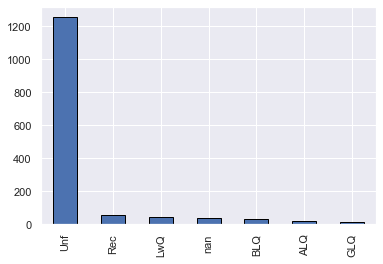

In [51]:
Housing['BsmtFinType2'].value_counts(dropna= False).plot(kind = 'bar', edgecolor = 'black')
plt.show()

In [52]:
100 * (Housing['BsmtFinType2'].value_counts(dropna = False)/len(Housing))

Unf    86.027397
Rec     3.698630
LwQ     3.150685
NaN     2.602740
BLQ     2.260274
ALQ     1.301370
GLQ     0.958904
Name: BsmtFinType2, dtype: float64

In [53]:
# Here Dropping column 'BsmtFinType2' as 88% of infomation is defined by level 'Unf' and missing values

Housing = Housing.drop('BsmtFinType2', axis = 1)

In [54]:
Housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,Y,0,61,0,0,0,0,0,Feb,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,Y,298,0,0,0,0,0,0,May,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,Y,0,42,0,0,0,0,0,Sep,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,Y,0,35,272,0,0,0,0,Feb,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,Y,192,84,0,0,0,0,0,Dec,2008,WD,Normal,250000


### 2.9 Missing value treatment for Column : `BsmtFinType1`

In [55]:
Housing['BsmtFinType1'].isnull().sum()

37

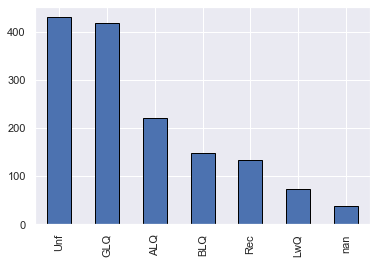

In [56]:
Housing['BsmtFinType1'].value_counts(dropna= False).plot(kind = 'bar', edgecolor = 'black')
plt.show()

In [57]:
# Here NaN value Represents No basement, repalceing Nan values with No_Bsmt

Housing['BsmtFinType1'] = Housing['BsmtFinType1'].replace(np.nan, 'NA')

In [58]:
Housing['BsmtFinType1'].isnull().sum()

0

### 2.10 Missing value treatment for Column : `BsmtCond`

In [59]:
Housing['BsmtCond'].isnull().sum()

37

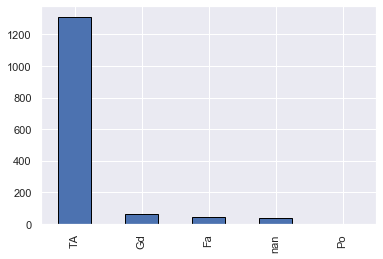

In [60]:
Housing['BsmtCond'].value_counts(dropna= False).plot(kind = 'bar', edgecolor = 'black')
plt.show()

In [61]:
100 * (Housing['BsmtCond'].value_counts(dropna= False)/len(Housing))

TA     89.794521
Gd      4.452055
Fa      3.082192
NaN     2.534247
Po      0.136986
Name: BsmtCond, dtype: float64

In [62]:
# Here NaN value Represents No basement, repalceing Nan values with No_Bsmt

Housing['BsmtCond'] = Housing['BsmtCond'].replace(np.nan, 'NA')

In [63]:
Housing['BsmtCond'].isnull().sum()

0

### 2.11 Missing value treatment for Column : `BsmtQual`

In [64]:
Housing['BsmtQual'].isnull().sum()

37

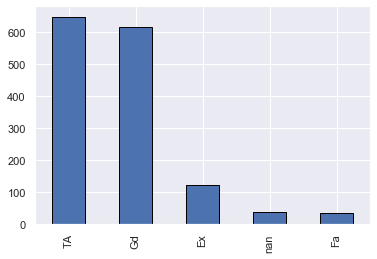

In [65]:
Housing['BsmtQual'].value_counts(dropna = False).plot(kind = 'bar', edgecolor = 'black')
plt.show()

In [66]:
100 * (Housing['BsmtQual'].value_counts(dropna= False)/len(Housing))

TA     44.452055
Gd     42.328767
Ex      8.287671
NaN     2.534247
Fa      2.397260
Name: BsmtQual, dtype: float64

In [67]:
# Here NaN value Represents No basement, repalceing Nan values with No_Bsmt

Housing['BsmtQual'] = Housing['BsmtQual'].replace(np.nan, 'NA')

In [68]:
Housing['BsmtQual'].isnull().sum()

0

### 2.12 Missing value treatment for Column : `MasVnrType`

In [69]:
Housing['MasVnrType'].isnull().sum()

8

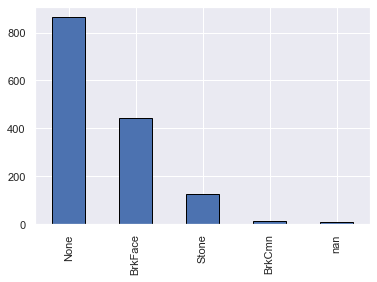

In [70]:
Housing['MasVnrType'].value_counts(dropna = False).plot(kind = 'bar', edgecolor = 'black')
plt.show()

In [71]:
100*(Housing['MasVnrType'].value_counts(dropna = False)/len(Housing))

None       59.178082
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
NaN         0.547945
Name: MasVnrType, dtype: float64

In [72]:
# Here NaN value Represents None, repalceing Nan values with None

Housing['MasVnrType'] = Housing['MasVnrType'].replace(np.nan, 'None')

In [73]:
Housing['MasVnrType'].isnull().sum()

0

### 2.13 Missing value treatment for Column : `MasVnrArea`

In [74]:
Housing['MasVnrArea'].isnull().sum() 

8

In [75]:
Housing['MasVnrArea'].value_counts(dropna= False)

0.0       861
72.0        8
180.0       8
NaN         8
108.0       8
120.0       7
16.0        7
106.0       6
80.0        6
340.0       6
200.0       6
132.0       5
170.0       5
360.0       5
84.0        5
320.0       5
270.0       4
183.0       4
100.0       4
168.0       4
252.0       4
178.0       4
246.0       4
196.0       4
288.0       4
216.0       4
160.0       4
220.0       4
336.0       4
210.0       4
76.0        4
300.0       4
40.0        4
268.0       4
456.0       4
42.0        3
44.0        3
99.0        3
74.0        3
420.0       3
82.0        3
110.0       3
208.0       3
169.0       3
90.0        3
148.0       3
166.0       3
350.0       3
145.0       3
186.0       3
240.0       3
272.0       3
104.0       3
174.0       3
176.0       3
136.0       3
70.0        3
50.0        3
116.0       3
226.0       3
128.0       3
312.0       3
85.0        3
256.0       3
130.0       3
147.0       2
205.0       2
135.0       2
284.0       2
362.0       2
660.0       2
101.0 

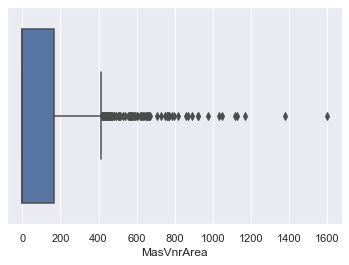

In [76]:
sns.boxplot(Housing['MasVnrArea'])
plt.show()

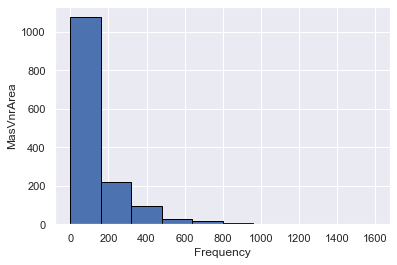

In [77]:
# Plotting Histogram for column 'LotFrontage'

plt.hist(Housing['MasVnrArea'], edgecolor = 'black')
plt.xlabel('Frequency')
plt.ylabel('MasVnrArea')
plt.show()

In [78]:
# Imputing missing values with median value, as we have outliers in the column 'LotFrontage'

med_MasVnrArea = Housing['MasVnrArea'].median()
med_MasVnrArea

0.0

In [79]:
Housing['MasVnrArea'] = Housing['MasVnrArea'].replace(np.nan, med_MasVnrArea)

In [80]:
Housing['MasVnrArea'].isnull().sum()

0

### 2.14 Missing value treatment for Column : `Electrical`

In [81]:
Housing['Electrical'].isnull().sum()

1

In [82]:
Housing['Electrical'].value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [83]:
100*(Housing['Electrical'].value_counts(dropna = False)/len(Housing))

SBrkr    91.369863
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
NaN       0.068493
Name: Electrical, dtype: float64

In [84]:
# Here Dropping column 'Electrical' as 91% of infomation is defined by level 'SBrkr' and missing values

Housing = Housing.drop('Electrical', axis = 1)

In [85]:
# Checking dimensions of dataframe Housing

print(f'Rows : {Housing.shape[0]}')
print(f'Columns : {Housing.shape[1]}')

Rows : 1460
Columns : 72


## 3. Data Cleaning

#### Addressing columns with 'Years'

- YearBuilt
- YearRemodAdd
- GarageYrBlt
- YrSold

### 3.1.1 Data Cleaning for column : `YearBuilt`

In [86]:
Housing['YearBuilt'].head()

0    2003
1    1976
2    2001
3    1915
4    2000
Name: YearBuilt, dtype: int64

In [87]:
# Creating derived column 'Age' for column 'YearBuilt' by reducing it from current year '2021'

Housing['Age'] = 2021 - Housing['YearBuilt']

In [88]:
Housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,Y,0,61,0,0,0,0,0,Feb,2008,WD,Normal,208500,18
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,Y,298,0,0,0,0,0,0,May,2007,WD,Normal,181500,45
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,Y,0,42,0,0,0,0,0,Sep,2008,WD,Normal,223500,20
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,Y,0,35,272,0,0,0,0,Feb,2006,WD,Abnorml,140000,106
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,Y,192,84,0,0,0,0,0,Dec,2008,WD,Normal,250000,21


### 3.1.2 Data Cleaning for column : `YearRemodAdd`

In [89]:
Housing['YearRemodAdd'].head()

0    2003
1    1976
2    2002
3    1970
4    2000
Name: YearRemodAdd, dtype: int64

In [90]:
# YearRemodAdd : Remodel data (same as Construction date if no remodeling or additions)

# Let's convert YearRemodAdd column to binary choice as 'Yes'(1) as remodeled and 'no'(0) as 'No remodeled'

def remodadd(x):
    
    if x['YearBuilt'] == x['YearRemodAdd']:
        return 1
    else:
        return 0
    
Housing['RemodAdd'] = Housing.apply(remodadd, axis = 1)

In [91]:
Housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age,RemodAdd
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,Y,0,61,0,0,0,0,0,Feb,2008,WD,Normal,208500,18,1
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,Y,298,0,0,0,0,0,0,May,2007,WD,Normal,181500,45,1
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,Y,0,42,0,0,0,0,0,Sep,2008,WD,Normal,223500,20,0
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,Y,0,35,272,0,0,0,0,Feb,2006,WD,Abnorml,140000,106,0
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,Y,192,84,0,0,0,0,0,Dec,2008,WD,Normal,250000,21,1


### 3.1.3 Data Cleaning for column : `GarageYrBlt`

In [92]:
Housing['GarageYrBlt'].describe()

count    1460.000000
mean     1868.739726
std       453.697295
min         0.000000
25%      1958.000000
50%      1977.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [93]:
# Creating derived column 'Age_Garage' for column 'GarageYrBlt' by reducing it from current year '2021'

def func_garage(x):
    
    if x['GarageYrBlt'] == 0:
        return 0
    else:
        return int(2021 - x['GarageYrBlt'])

Housing['Age_Garage'] = Housing.apply(func_garage, axis = 1)

### 3.1.4 Data Cleaning for column : `YrSold`

In [94]:
Housing['YrSold'].head()

0    2008
1    2007
2    2008
3    2006
4    2008
Name: YrSold, dtype: int64

In [95]:
# Creating column for Age of property as 'Property_age'

def Property_age_check(x):
    
    if (x['YearBuilt'] == x['YearRemodAdd']):
        
        return (x['YrSold'] - x['YearBuilt'])
    else:
        
        return (x['YrSold'] - x['YearRemodAdd'])

Housing['Property_age']  = Housing.apply(Property_age_check, axis = 1)   

In [96]:
Housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age,RemodAdd,Age_Garage,Property_age
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,Y,0,61,0,0,0,0,0,Feb,2008,WD,Normal,208500,18,1,18,5
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,Y,298,0,0,0,0,0,0,May,2007,WD,Normal,181500,45,1,45,31
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,Y,0,42,0,0,0,0,0,Sep,2008,WD,Normal,223500,20,0,20,6
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,Y,0,35,272,0,0,0,0,Feb,2006,WD,Abnorml,140000,106,0,23,36
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,Y,192,84,0,0,0,0,0,Dec,2008,WD,Normal,250000,21,1,21,8


In [97]:
# Dropping columns YearBuilt, YearRemodAdd, GarageYrBlt, YrSold as we have created derived columns from them.

Housing = Housing.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis = 1)

In [98]:
Housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age,RemodAdd,Age_Garage,Property_age
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,Y,0,61,0,0,0,0,0,Feb,WD,Normal,208500,18,1,18,5
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,Y,298,0,0,0,0,0,0,May,WD,Normal,181500,45,1,45,31
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,Y,0,42,0,0,0,0,0,Sep,WD,Normal,223500,20,0,20,6
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,Y,0,35,272,0,0,0,0,Feb,WD,Abnorml,140000,106,0,23,36
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,Y,192,84,0,0,0,0,0,Dec,WD,Normal,250000,21,1,21,8


### 3.2 Data Cleaning - skewness of columns

In [99]:
# Selecting columns whose max level value count is greater than  85% of row count.

skewe_col = Housing

skewe_col.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SaleType', 'Sal

In [100]:
# Creating function who will append column name who is skewed more than 85% of count.

skewed_col = []

for i in skewe_col.columns:
    
    if Housing[i].value_counts().max() >= ((len(Housing))*.85):
        
        print(Housing[i].value_counts(), Housing[i].value_counts().max())
        
        skewed_col.append(i)

print(f'We have {len(skewed_col)} skewed columns')

print(skewed_col)

Pave    1454
Grvl       6
Name: Street, dtype: int64 1454
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 1311
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 1459
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 1382
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64 1260
Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64 1445
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Metal         1
Roll          1
Membran       1
Name: RoofMatl, dtype: int64 1434
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64 1282
TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64 1311
0       1293
180        5
374        3
551        2
9

In [101]:
# Dropping Skewed columns from Housing Dataframe

Housing = Housing.drop(skewed_col, axis= 1)

In [102]:
Housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SaleCondition,SalePrice,Age,RemodAdd,Age_Garage,Property_age
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,Attchd,RFn,2,548,0,61,Feb,Normal,208500,18,1,18,5
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,Attchd,RFn,2,460,298,0,May,Normal,181500,45,1,45,31
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,Attchd,RFn,2,608,0,42,Sep,Normal,223500,20,0,20,6
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Detchd,Unf,3,642,0,35,Feb,Abnorml,140000,106,0,23,36
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,Attchd,RFn,3,836,192,84,Dec,Normal,250000,21,1,21,8


In [103]:
# Checking dimensions of dataframe Housing

print(f'Rows : {Housing.shape[0]}')
print(f'Columns : {Housing.shape[1]}')

Rows : 1460
Columns : 49


In [104]:
# Dropping ID Column

Housing = Housing.drop('Id', axis = 1)

In [105]:
print('Total int columns are : ',len(Housing.select_dtypes(exclude = ['object','float']).columns))

Total int columns are :  24


In [106]:
print('Total float columns are : ',len(Housing.select_dtypes(exclude = ['object','int64']).columns))

Total float columns are :  2


In [107]:
print('Total Object columns are : ',len(Housing.select_dtypes(include = 'object').columns))

Total Object columns are :  22


## 4. Exploratory data analysis

In [108]:
# Moving Target variable

target_var = Housing['SalePrice']

Housing_1 = Housing.drop('SalePrice',axis = 1)

Housing = pd.concat([target_var, Housing_1], axis =1)

In [109]:
Housing.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SaleCondition,Age,RemodAdd,Age_Garage,Property_age
0,208500,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,Attchd,RFn,2,548,0,61,Feb,Normal,18,1,18,5
1,181500,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,Attchd,RFn,2,460,298,0,May,Normal,45,1,45,31
2,223500,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,Attchd,RFn,2,608,0,42,Sep,Normal,20,0,20,6
3,140000,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Detchd,Unf,3,642,0,35,Feb,Abnorml,106,0,23,36
4,250000,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,Attchd,RFn,3,836,192,84,Dec,Normal,21,1,21,8


In [110]:
# Selecting Numerical columns form dataset

num_Hou = Housing.select_dtypes(exclude = 'object')
num_Hou.head()

,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Age,RemodAdd,Age_Garage,Property_age
0,208500,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,8,0,2,548,0,61,18,1,18,5
1,181500,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,6,1,2,460,298,0,45,1,45,31
2,223500,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,6,1,2,608,0,42,20,0,20,6
3,140000,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,7,1,3,642,0,35,106,0,23,36
4,250000,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,9,1,3,836,192,84,21,1,21,8


In [111]:
num_Hou.shape

(1460, 26)

In [112]:
cate_Hou = Housing.select_dtypes(include = 'object')
cate_Hou.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish,MoSold,SaleCondition
0,2-STORY 1946 & NEWER,RL,Reg,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,Attchd,RFn,Feb,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Reg,FR2,Veenker,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,RFn,May,Normal
2,2-STORY 1946 & NEWER,RL,IR1,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,Attchd,RFn,Sep,Normal
3,2-STORY 1945 & OLDER,RL,IR1,Corner,Crawfor,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Detchd,Unf,Feb,Abnorml
4,2-STORY 1946 & NEWER,RL,IR1,FR2,NoRidge,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,Attchd,RFn,Dec,Normal


In [113]:
cate_Hou.shape

(1460, 22)

### 4.1 Univariate Analysis

#### 4.1.1 Numerical columns

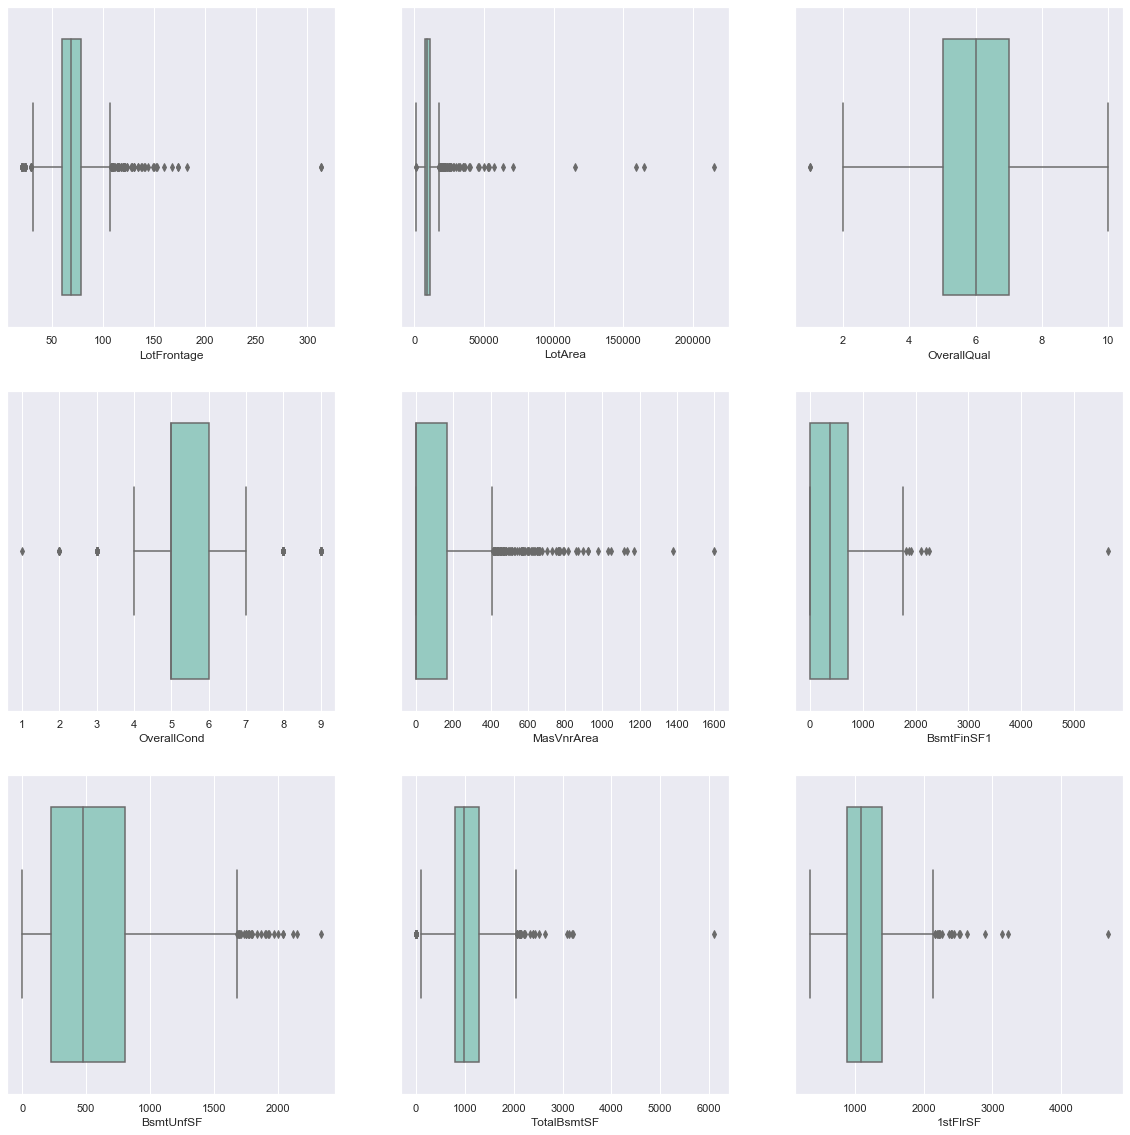

In [114]:
# Plotting boxplot for univeriate analysis

plt.figure(figsize = (20, 20))
f = num_Hou.columns[1:10]
for  i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(num_Hou[i[-1]], palette='Set3')

### Inferences:

- From plot, distribution of LotArea, MasVnrArea and BsmtFinSF2 can be seen with outliers.
- OverallQual, OverallCond and BsmtUnfSF have median value at 6,5 and 500 respectivly.

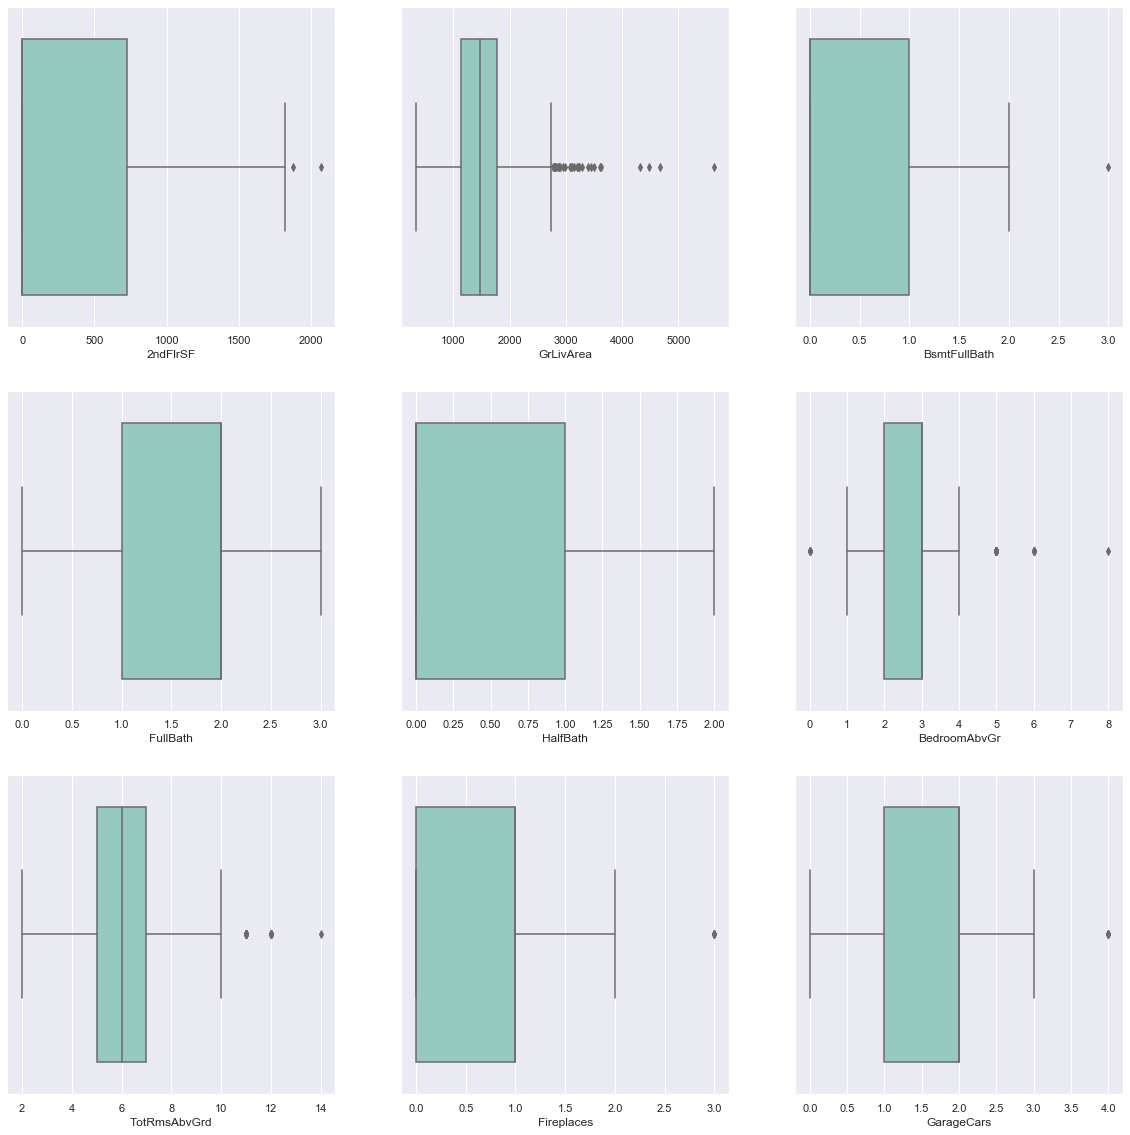

In [115]:
# Plotting boxplot for univeriate analysis

plt.figure(figsize = (20, 20))
f = num_Hou.columns[10:19]
for  i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(num_Hou[i[-1]], palette='Set3')

### Inferences:

- For column LowQualFinSF and BsmtHafBath have mean and median on 0.
- For FulBath values mostly located in between 1 and 2.

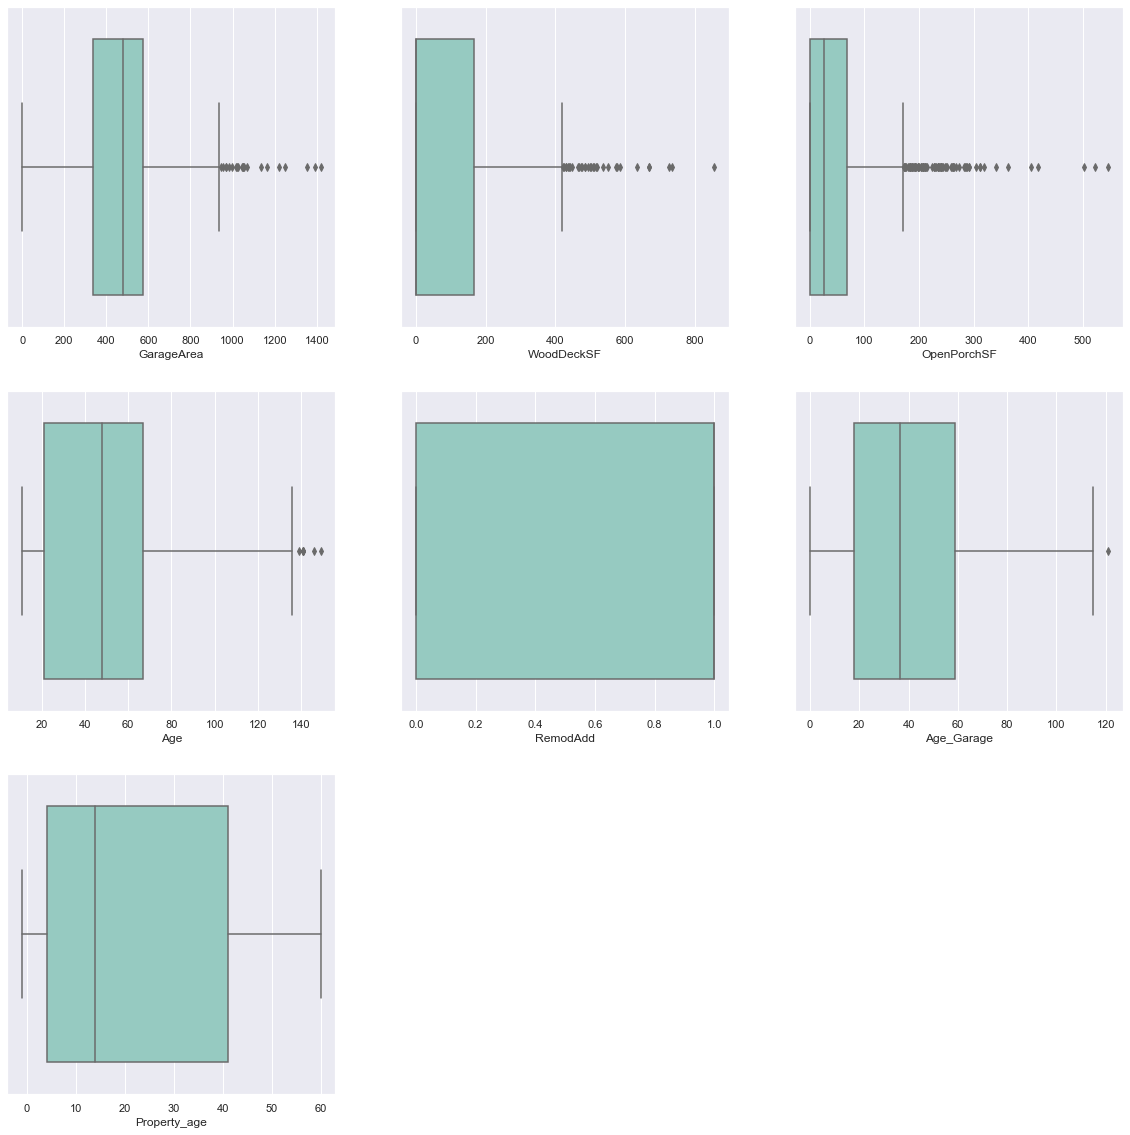

In [116]:
# Plotting boxplot for univeriate analysis

plt.figure(figsize = (20, 20))
f = num_Hou.columns[19:27]
for  i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(num_Hou[i[-1]], palette='Set3')

### Inferences:

- For column KichanAbvGr mean and median located at 1.0 with some outliers.
- For EnclosedPorch values located at 0 with outliers.

#### 1.1.2 Categorical columns

In [117]:
# Univariate analysis for categorical columns
cate_Hou.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType',
       'GarageFinish', 'MoSold', 'SaleCondition'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

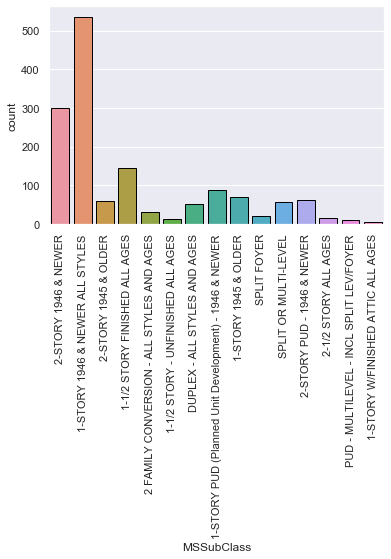

In [118]:
sns.countplot(x = Housing['MSSubClass'], edgecolor = 'black')
plt.xticks(rotation = 90)

22


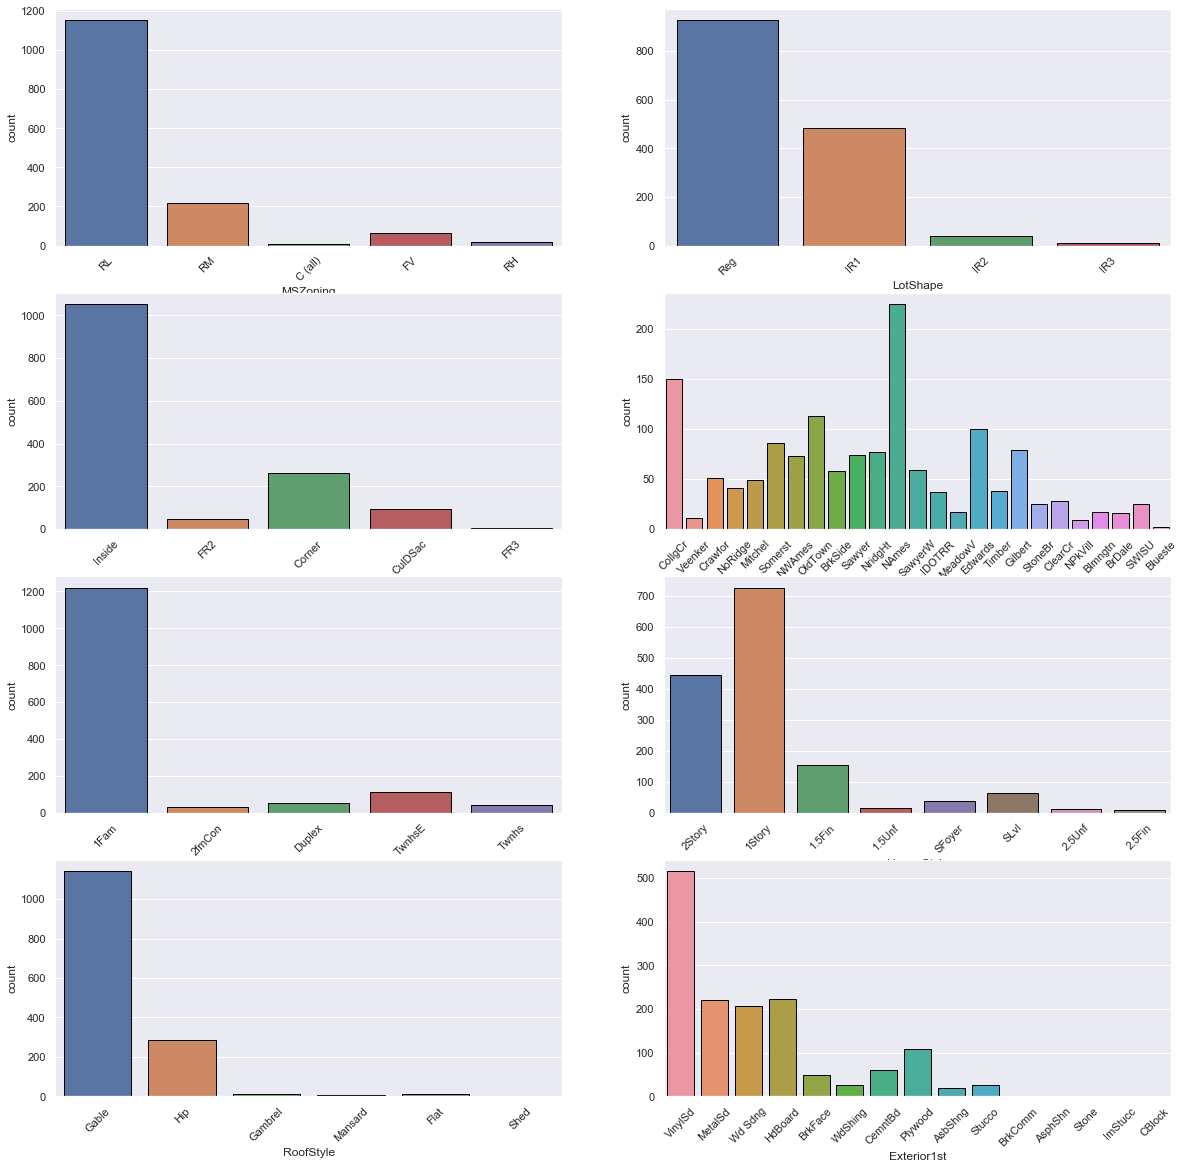

In [119]:
# Univariate analysis for categorical columns

plt.figure(figsize = (20, 20))
f = cate_Hou.columns
print(len(f))
for i in enumerate(f[1:9]):
    plt.subplot(4,2,i[0]+1)
    sns.countplot(x = cate_Hou[i[1]], edgecolor = 'black')
    plt.xticks(rotation = 45)

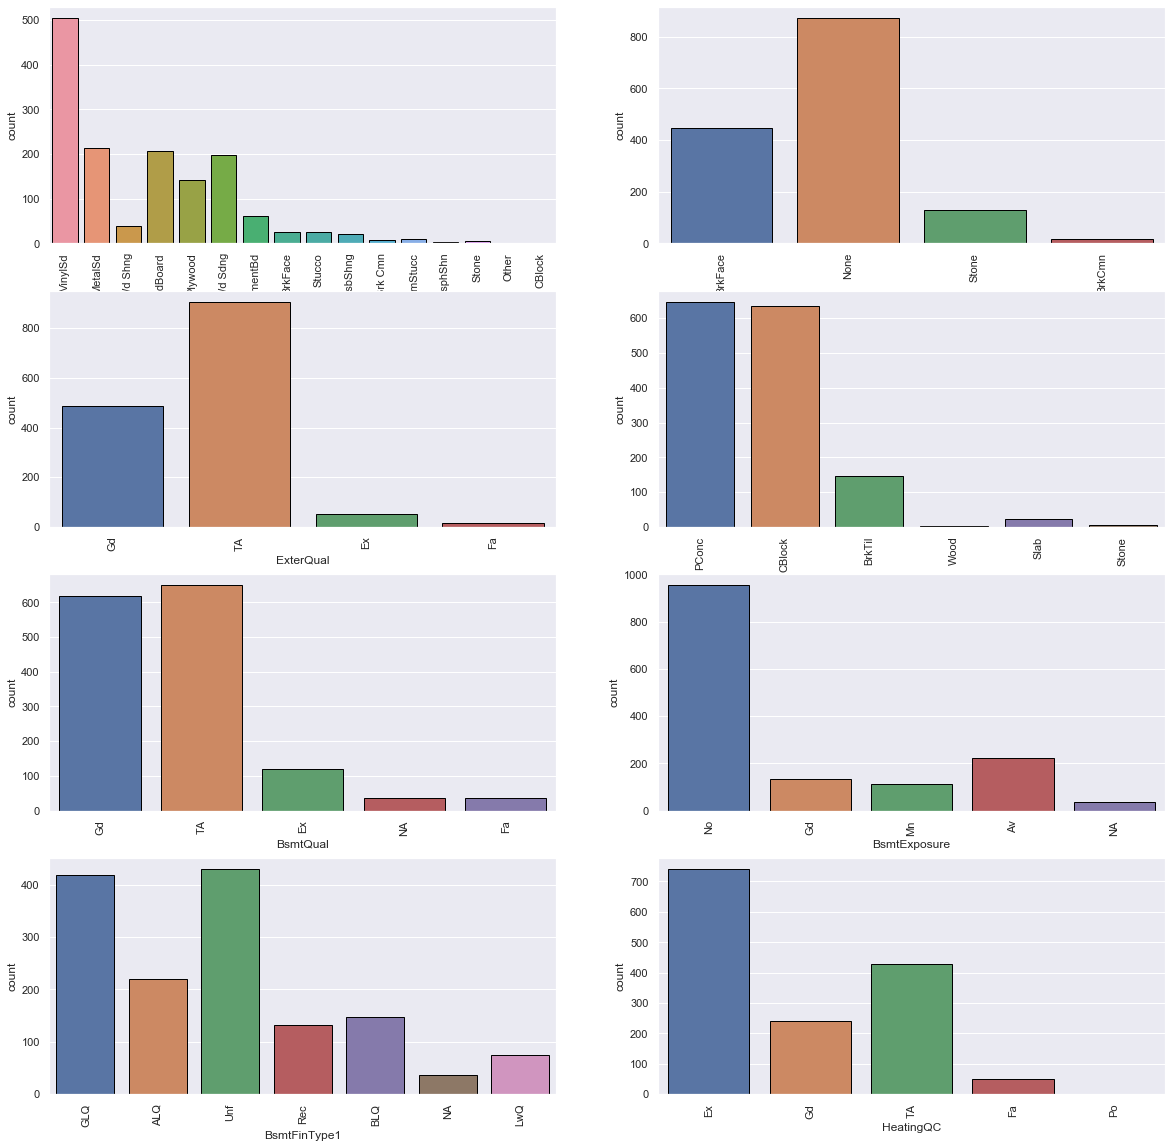

In [120]:
plt.figure(figsize = (20, 20))
f = cate_Hou.columns
for i in enumerate(f[9:17]):
    plt.subplot(4,2,i[0]+1)
    sns.countplot(x = cate_Hou[i[1]], edgecolor = 'black')
    plt.xticks(rotation = 90)

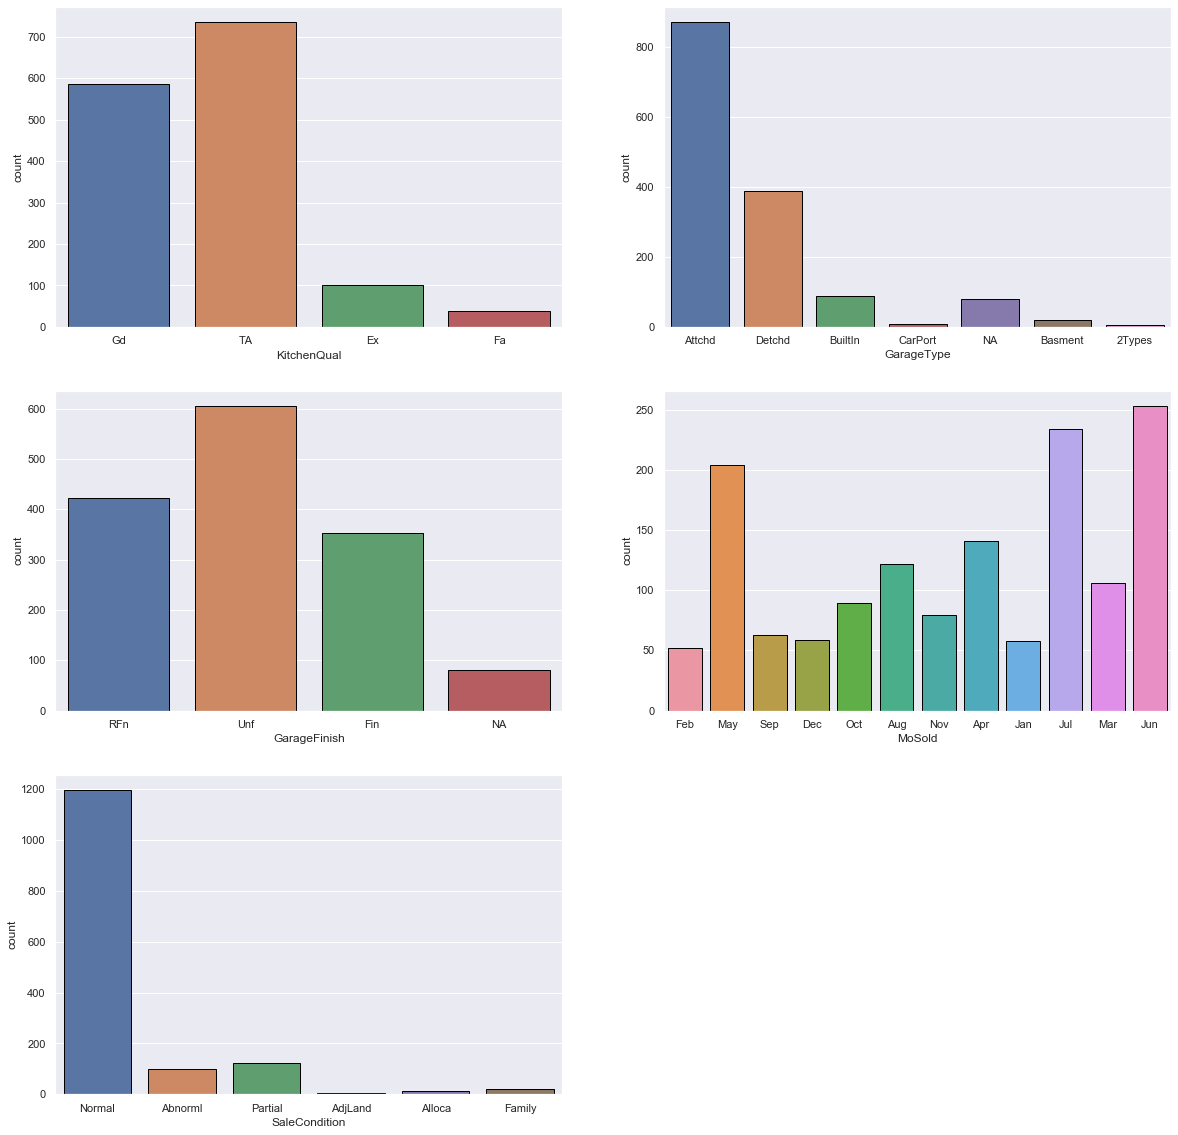

In [121]:
plt.figure(figsize = (20, 20))
f = cate_Hou.columns
for i in enumerate(f[17:22]):
    plt.subplot(3,2,i[0]+1)
    sns.countplot(x = cate_Hou[i[1]], edgecolor = 'black')
    plt.xticks(rotation = 0)

## 4.2 Bi-variate Analysis with target variable SalePrice

### 4.2.1 Bivariate analysis with Numerical columns

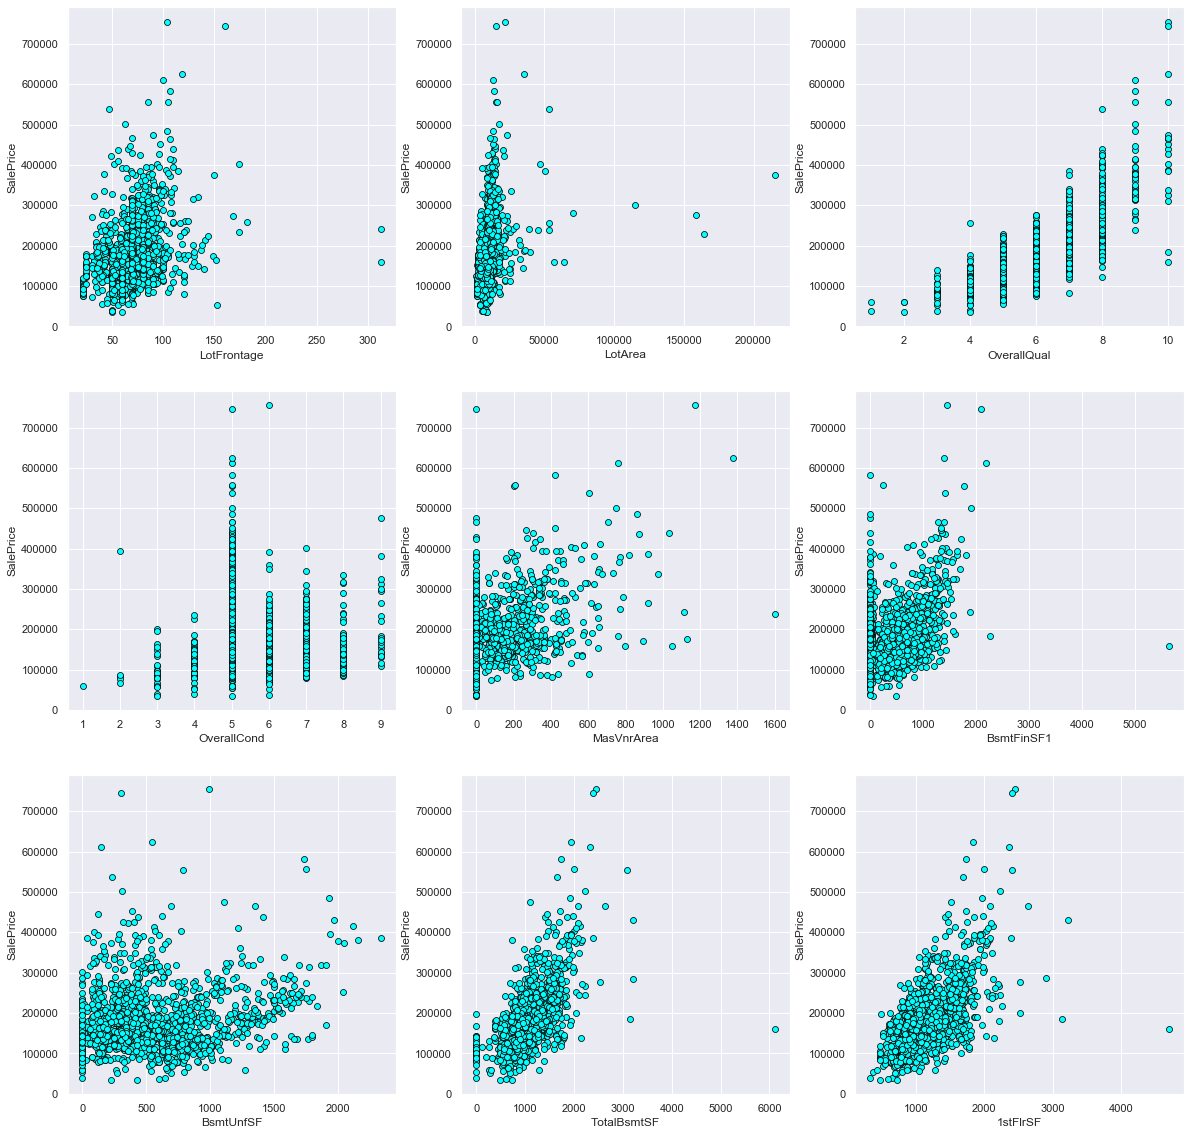

In [122]:
# Plotting Numerical columns with Target variable SalePrice

plt.figure(figsize = (20, 20))
f = num_Hou.columns[1:10]
for i in enumerate(f):
    plt.subplot(3,3,i[0] + 1)
    sns.scatterplot(x = num_Hou[i[1]],y = Housing['SalePrice'], color='cyan', edgecolor = 'black')

### Inferences:

- For columns LotFrontage sale Price mostly varies between 100K to 300K
- For column OverallQual and OverallCond  sale price shows positive relationship.

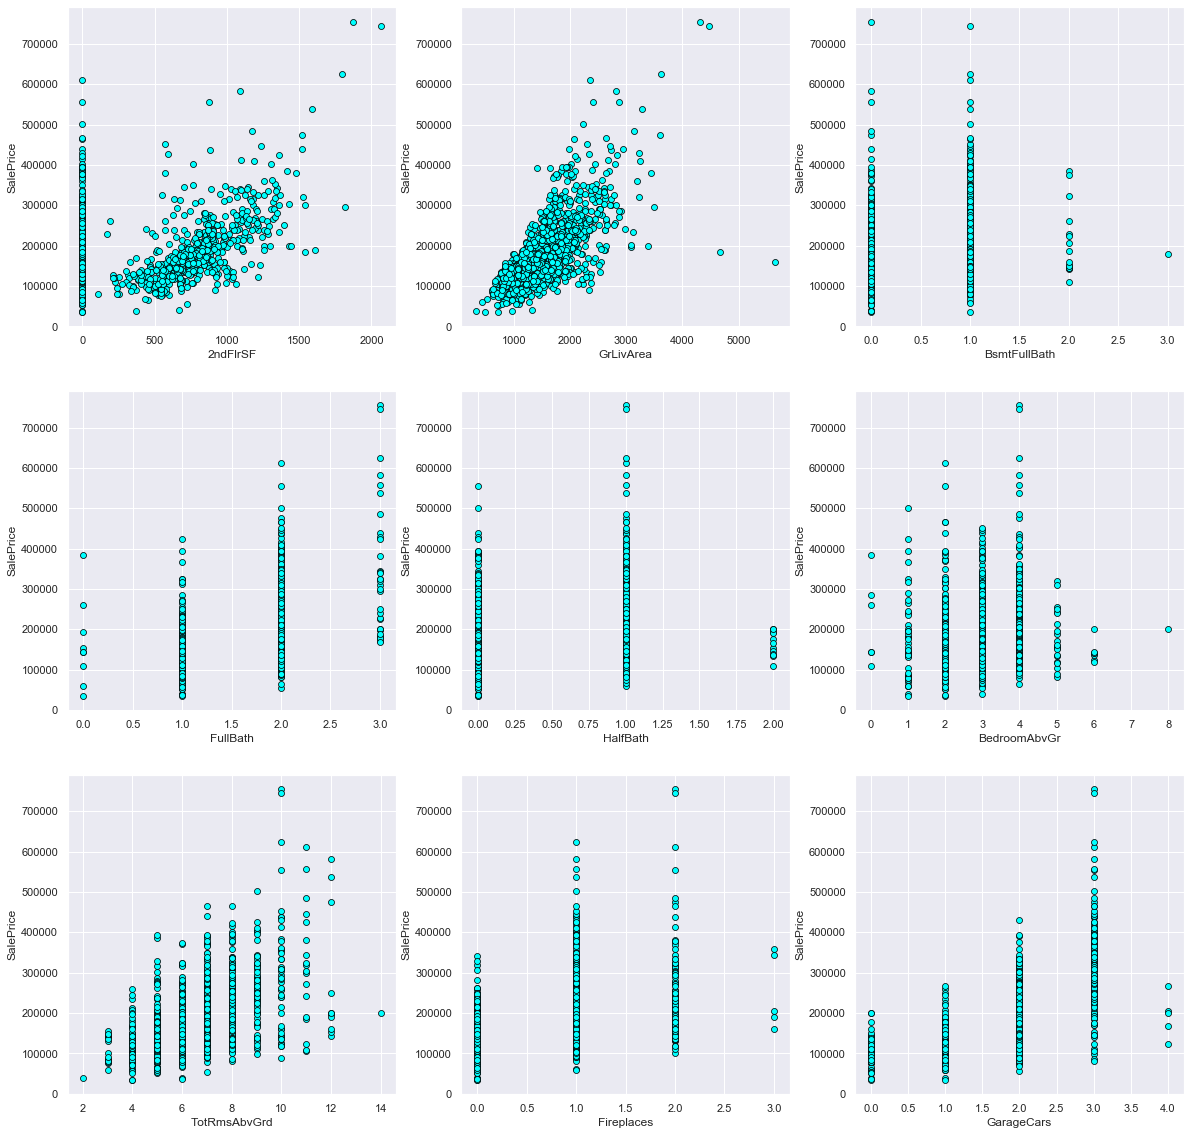

In [123]:
plt.figure(figsize = (20, 20))
f = num_Hou.columns[10:19]
for i in enumerate(f):
    plt.subplot(3,3,i[0] + 1)
    sns.scatterplot(x = num_Hou[i[1]],y = Housing['SalePrice'], color='cyan', edgecolor = 'black')

### Inferences:

- Columns TotalBsmtSF, 1stflrSF, 2ndFlrSF and GrLivArea have positive relationship with sale price.
- Columns LowQualFinSF, BsmtFullBath, BsmyHalfBath, FullBath, HalfBath have defined values with sale prices, as number increases to 1 to above. 

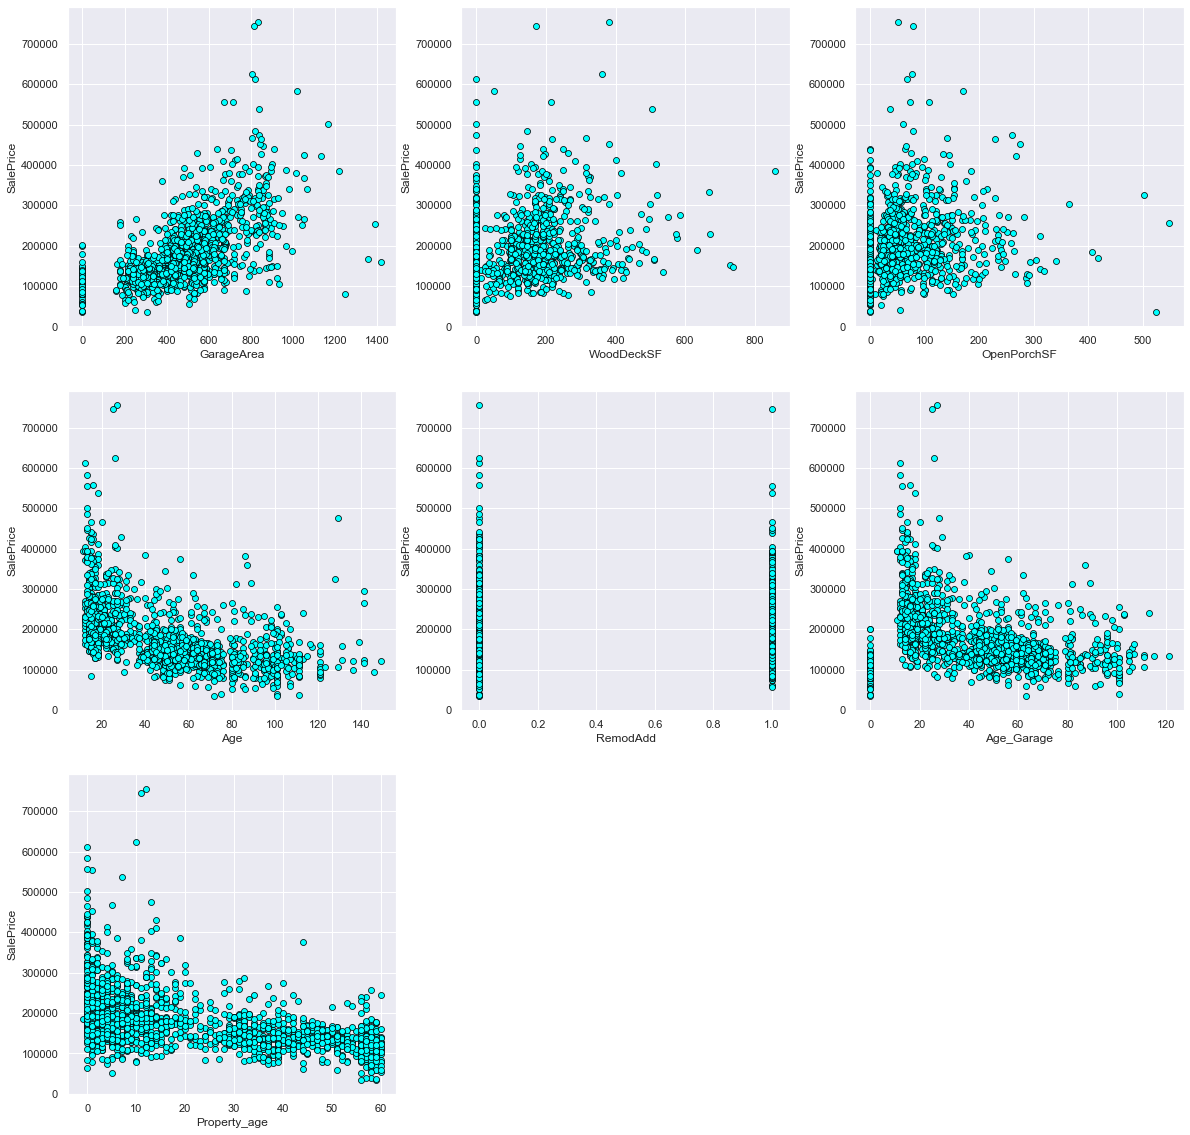

In [124]:
plt.figure(figsize = (20, 20))
f = num_Hou.columns[19:28]
for i in enumerate(f):
    plt.subplot(3,3,i[0] + 1)
    sns.scatterplot(x = num_Hou[i[1]],y = Housing['SalePrice'], color='cyan', edgecolor = 'black')

### Inferences:

- For Columns GarageArea, WoodDeckSF, OpenPorchSF and EnclosedPorch have linear positive relationship with sale price.
- Sale price fluctuate with increase in number of Fireplace, GarageCars, KichenAbvGr, BedroomAbvGr.

### 4.2.2 Bivariate analysis with Categorical columns:

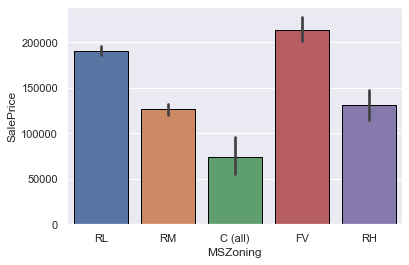

In [125]:
sns.barplot(x = Housing['MSZoning'],y = Housing['SalePrice'], edgecolor = 'black')
plt.show()

22


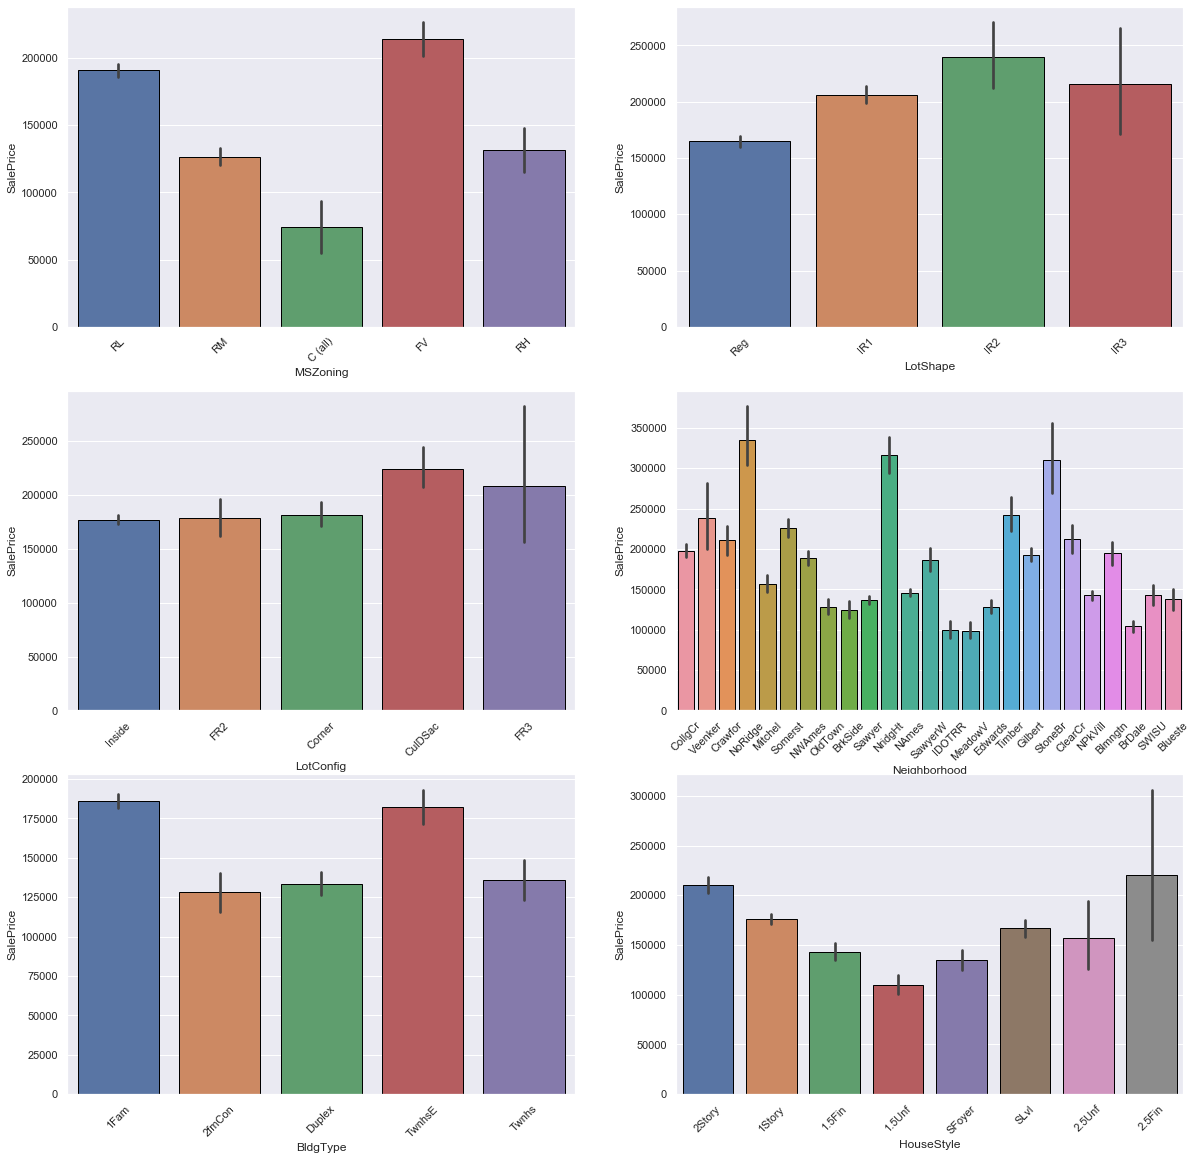

In [126]:
# Plotting the Categorical columns with target variable SalePrice

print(len(cate_Hou.columns))

plt.figure(figsize = (20, 20))
f = cate_Hou.columns
for i in enumerate(f[1:7]):
    plt.subplot(3,2,i[0]+1)
    sns.barplot(x = cate_Hou[i[1]],y = Housing['SalePrice'], edgecolor = 'black')
    plt.xticks(rotation = 45)

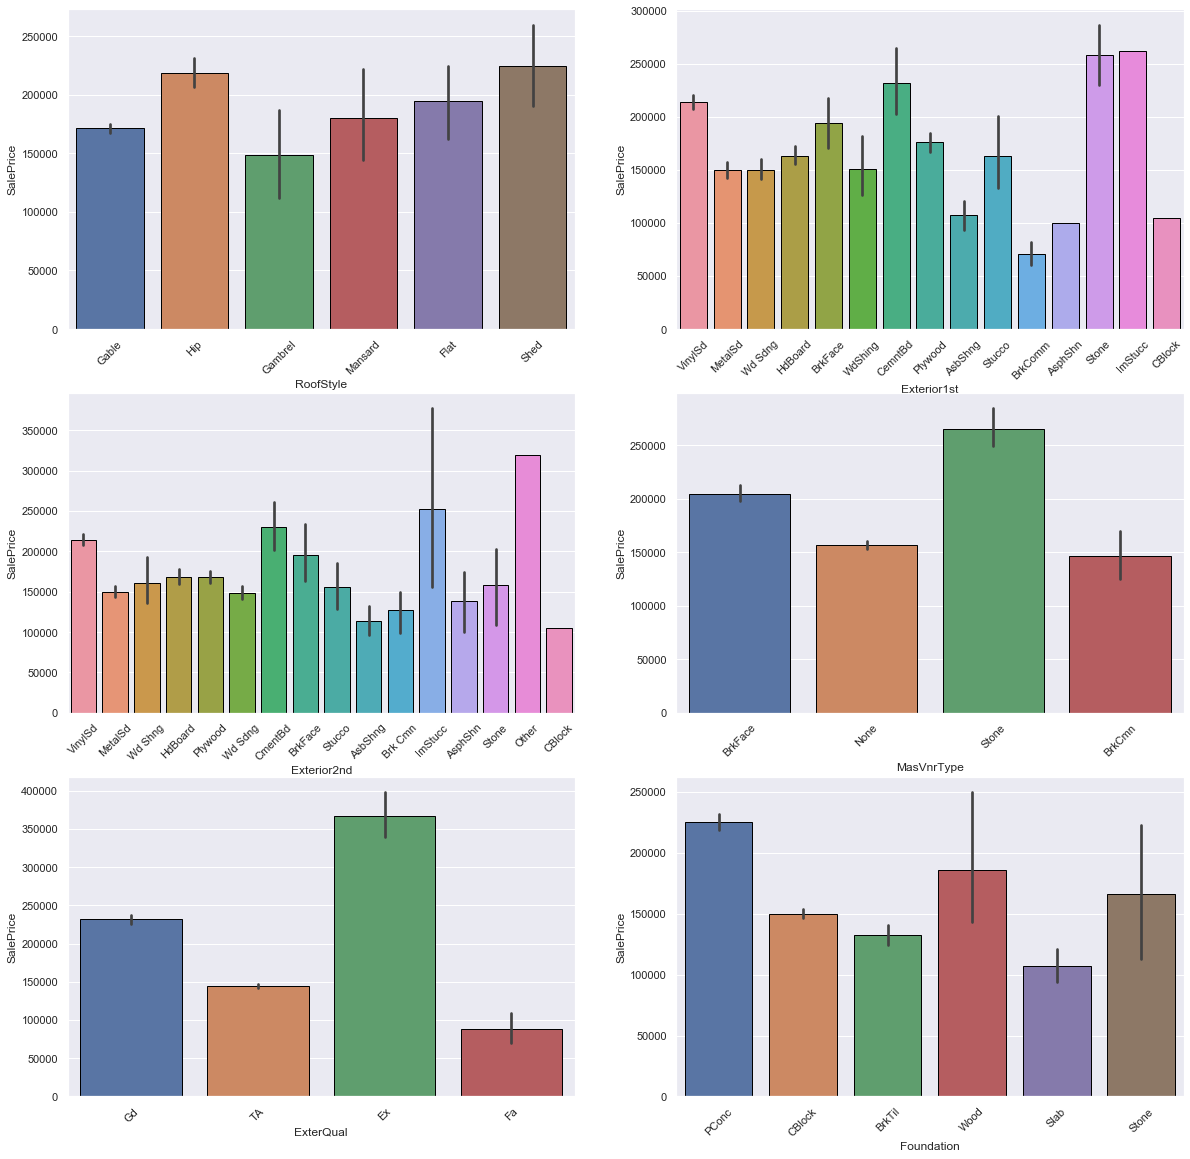

In [127]:
# Plotting the Categorical columns with target variable SalePrice

plt.figure(figsize = (20, 20))
f = cate_Hou.columns[7:13]
for i in enumerate(f):
    plt.subplot(3,2,i[0]+1)
    sns.barplot(x = cate_Hou[i[1]],y = Housing['SalePrice'], edgecolor = 'black')
    plt.xticks(rotation = 45)

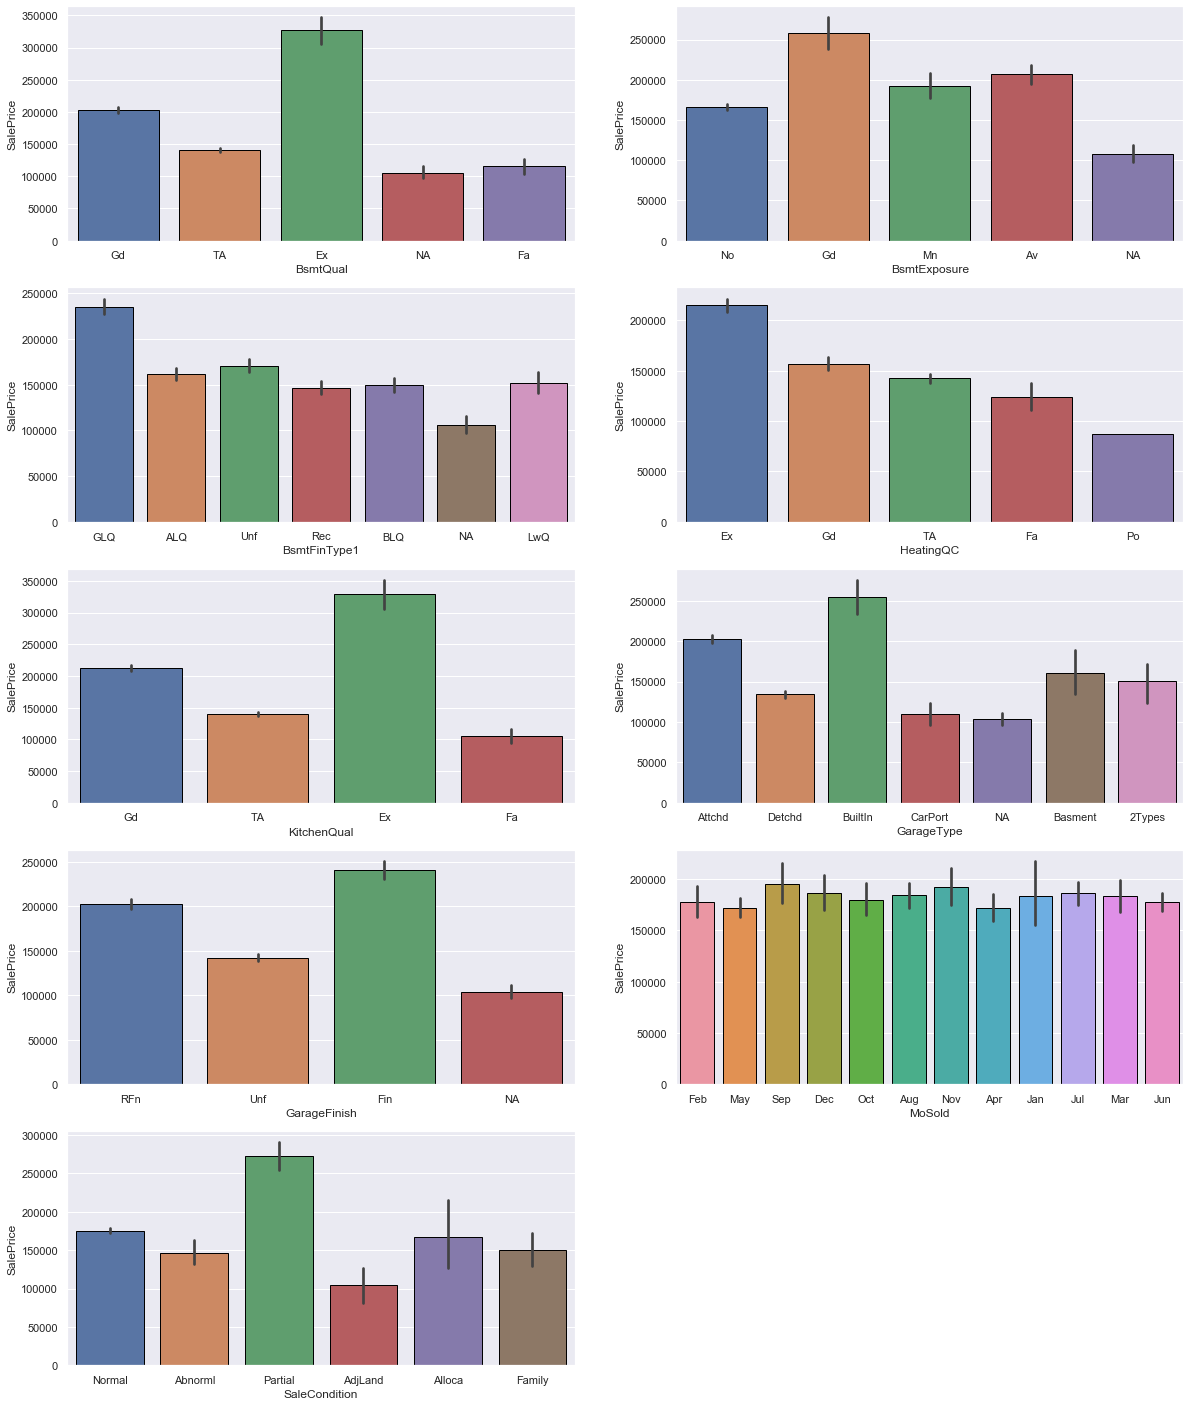

In [128]:
# Plotting the Categorical columns with target variable SalePrice

plt.figure(figsize = (20, 25))
f = cate_Hou.columns[13:23]
for i in enumerate(f):
    plt.subplot(5,2,i[0]+1)
    sns.barplot(x = cate_Hou[i[1]],y = Housing['SalePrice'], edgecolor = 'black')

### Inferences:

- Median & Max sale price for 2-Story 1946 & Newer has highest, Lowest Median sale price is for 1-Story 1945 & Older
- Floating Village Residential has high sale price and Commercial has the lowest
- LotShape regular has lowest Median Sale Price where as all others have almost same median Sale price. Irregular lot shape has the lowest InterQuartile range.
- LotConfig CulDSac has the highest median value which is almost equal to third quartile of FR with first quartile equal to Median of Corner.
- Neighbourhood IDOTRR has lowest median value and NridgHt & Timber have highest IQR.
- HouseStyle 2Story has the highest median followed by Split Level.
- Overall Quality of very excellent has the highest median value and keeps on decreasing with respect to overall quality.
- Overall Condition of Average has highest median.Overall Condition of 1,2 & 3 has same median and IQR.
- RoomStyle of Gable and Hip has same median and IQR.
- Exterior1st has highest median and IQR. MetalSd & Wd Sdng has same median and IQR.
- Exterior2nd of HdBoard and Plywood has same median and IQR. VinlySd has highest median. MetalSd and Wd Sdng has same median value.
- MasVnrType Stone has the highest median and IQR value.
- ExterQual has the highest mdeian value for rating 1 and followed by 2 and 3.
- Foundation PConc has highest median followed by CBlock & Others.
- Basement Quality has highest median and IQR followed by 2,3&4.
- BsmtFinType1 of 1 has highest median and IQR.


### 4.3 Data Cleaning

#### Lets reduce less frequency levels into 'other' in column - 'Neighborhood', 'Exterior1st', 'Exterior2nd'

### 4.3.1 Column : `Neighborhood`

In [129]:
Housing['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [130]:
Housing['Neighborhood'] = Housing['Neighborhood'].replace(['SWISU','StoneBr','MeadowV',
                                                          'Blmngtn','BrDale','Veenker','NPkVill','Blueste'], 'other')

In [131]:
Housing['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
other      122
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
Name: Neighborhood, dtype: int64

### 4.3.1 Column : `Exterior1st`

In [132]:
Housing['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [133]:
Housing['Exterior1st'] = Housing['Exterior1st'].replace(['BrkComm','Stone','AsphShn','ImStucc','CBlock'], 'other')

In [134]:
Housing['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
other        7
Name: Exterior1st, dtype: int64

### 4.3.1 Column : `Exterior2nd`

In [135]:
Housing['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [136]:
Housing['Exterior2nd'] = Housing['Exterior2nd'].replace(['Brk Cmn','BrkComm','Stone','AsphShn','Other','CBlock'], 'other')

In [137]:
Housing['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
other       17
ImStucc     10
Name: Exterior2nd, dtype: int64

### 4.4 Outlier Treatment

In [138]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = Housing['LotArea'].quantile(0.98)
Housing = Housing[Housing["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = Housing['MasVnrArea'].quantile(0.98)
Housing = Housing[Housing["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = Housing['TotalBsmtSF'].quantile(0.99)
Housing = Housing[Housing["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = Housing['WoodDeckSF'].quantile(0.99)
Housing = Housing[Housing["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = Housing['OpenPorchSF'].quantile(0.99)
Housing = Housing[Housing["OpenPorchSF"] < nn_quartile_OpenPorchSF]

### 4.5 Target Variable- Sale Price

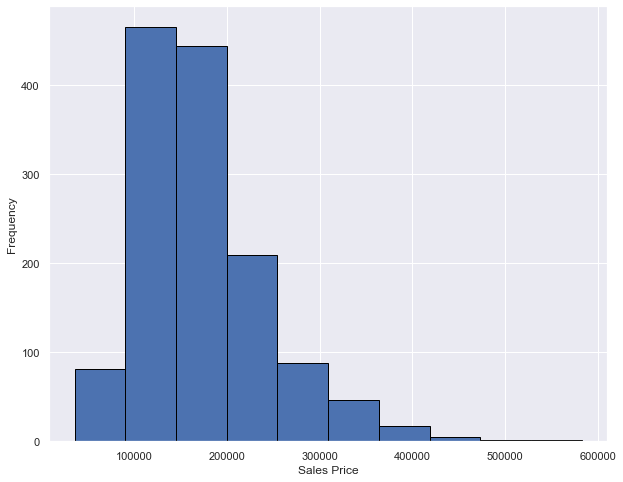

In [139]:
# Target variable - SalePrice

plt.figure(figsize = (10,8))
plt.hist(Housing['SalePrice'], edgecolor = 'black')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.show()

### Inferences:

- Target variable is non-linear in nature.
- Target Variable is right skewed and Hence Transform, Using `log transformation` to normalise the data.


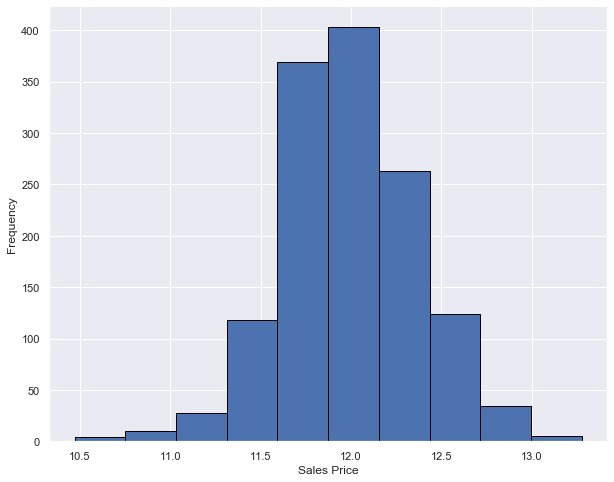

In [140]:
# Using log Transformation

Housing['SalePrice'] = np.log1p(Housing['SalePrice'])

# Plotting histogram

plt.figure(figsize = (10,8))
plt.hist(Housing['SalePrice'], edgecolor = 'black')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.show()

### 4.6 Plotting Correlation

In [141]:
# Plotting correlation between variables

Housing_corr = (round(Housing.corr(),2)).sort_values('SalePrice', ascending = False)

Housing_corr

,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Age,RemodAdd,Age_Garage,Property_age
SalePrice,1.00,0.34,0.38,0.81,-0.02,0.38,0.35,0.20,0.61,0.58,0.30,0.69,0.22,0.59,0.30,0.22,0.51,0.46,0.66,0.64,0.31,0.39,-0.60,0.10,-0.35,-0.58
OverallQual,0.81,0.19,0.17,1.00,-0.09,0.37,0.19,0.29,0.51,0.43,0.27,0.56,0.10,0.54,0.25,0.11,0.39,0.38,0.59,0.54,0.22,0.36,-0.58,0.10,-0.37,-0.55
GrLivArea,0.69,0.31,0.39,0.56,-0.07,0.31,0.07,0.23,0.33,0.48,0.70,1.00,-0.02,0.63,0.42,0.56,0.83,0.43,0.45,0.43,0.18,0.34,-0.18,-0.07,-0.14,-0.28
GarageCars,0.66,0.27,0.26,0.59,-0.18,0.34,0.19,0.20,0.42,0.42,0.17,0.45,0.11,0.47,0.19,0.09,0.34,0.28,1.00,0.89,0.21,0.26,-0.53,0.16,-0.22,-0.42
GarageArea,0.64,0.30,0.30,0.54,-0.14,0.34,0.23,0.18,0.44,0.45,0.12,0.43,0.15,0.41,0.13,0.08,0.31,0.24,0.89,1.00,0.21,0.27,-0.48,0.16,-0.23,-0.37
TotalBsmtSF,0.61,0.29,0.29,0.51,-0.16,0.31,0.43,0.44,1.00,0.77,-0.25,0.33,0.28,0.31,-0.11,0.05,0.21,0.28,0.42,0.44,0.20,0.22,-0.41,0.11,-0.24,-0.30
FullBath,0.59,0.17,0.19,0.54,-0.20,0.24,0.03,0.27,0.31,0.37,0.40,0.63,-0.07,1.00,0.12,0.35,0.53,0.23,0.47,0.41,0.19,0.31,-0.48,0.09,-0.40,-0.44
1stFlrSF,0.58,0.34,0.39,0.43,-0.14,0.30,0.35,0.31,0.77,1.00,-0.28,0.48,0.21,0.37,-0.19,0.13,0.36,0.36,0.42,0.45,0.19,0.18,-0.28,0.04,-0.15,-0.24
TotRmsAbvGrd,0.51,0.31,0.37,0.39,-0.05,0.24,-0.04,0.24,0.21,0.36,0.61,0.83,-0.09,0.53,0.33,0.70,1.00,0.30,0.34,0.31,0.11,0.24,-0.07,-0.06,-0.07,-0.17
Fireplaces,0.46,0.20,0.31,0.38,-0.01,0.22,0.20,0.04,0.28,0.36,0.19,0.43,0.10,0.23,0.20,0.11,0.30,1.00,0.28,0.24,0.18,0.17,-0.14,-0.05,0.03,-0.10


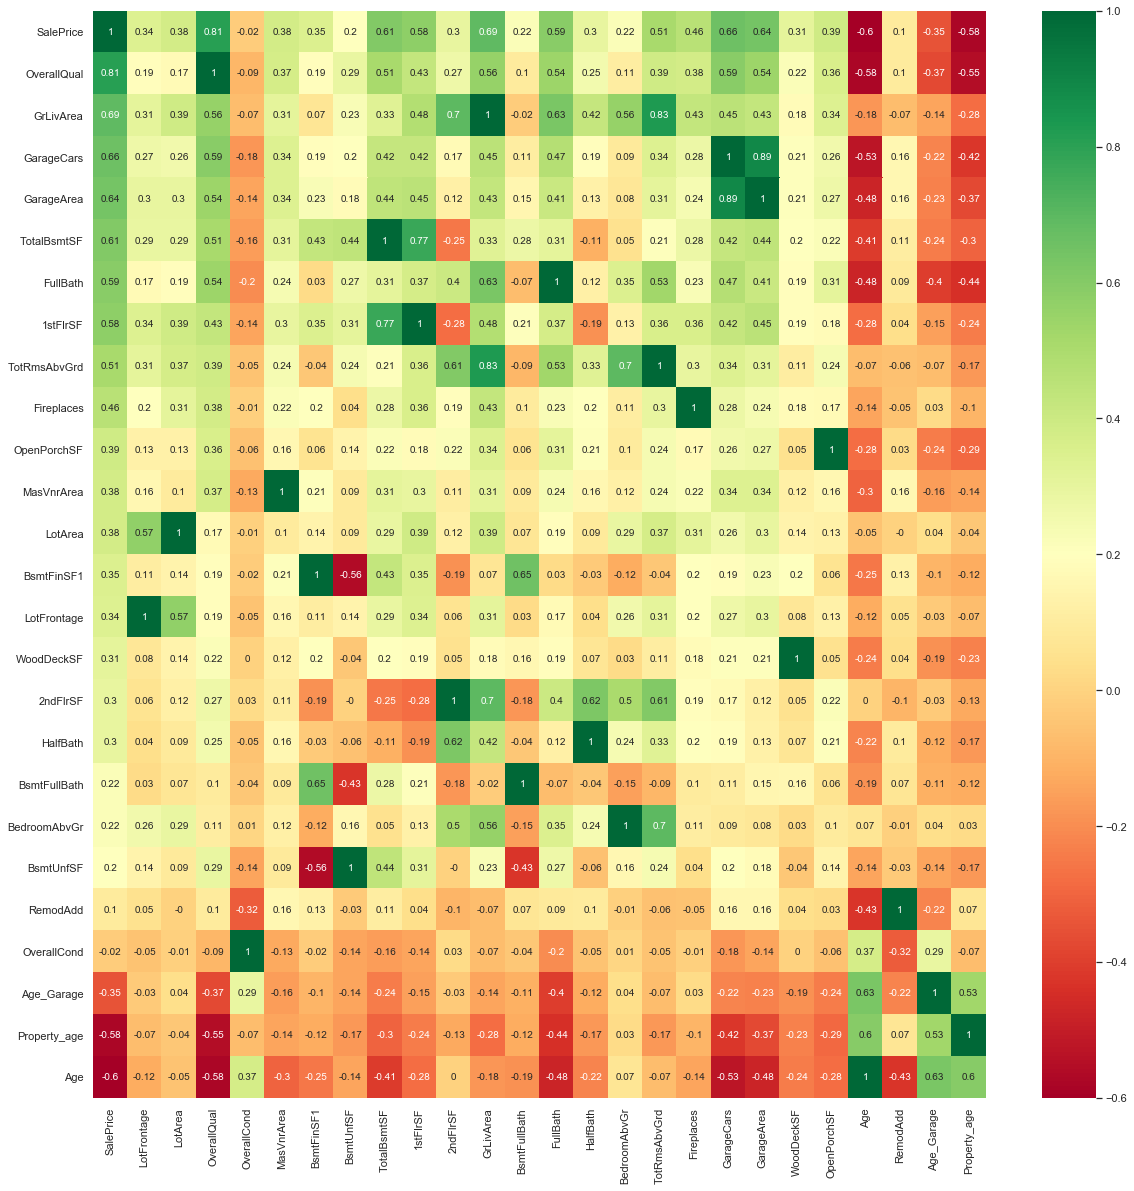

In [142]:
# Plotting heatmap 

plt.figure(figsize = (20, 20))
sns.heatmap(Housing_corr, annot = True, cmap="RdYlGn")
plt.show()

### Inferences:

- Columns OverallQual, GrLivArea have high correlation with Sale Price as 82% and 70%.
- Column Property_age and Age have negative correaltion with Sale Price.
- Correlation between variable GarageArea and GarageCars is highesr as 88%.
Also TotalRmsAbvGrd and GrLiveArea have correlation as 83%.

## 5. Data Preparation

### Handling Categorical Data:


__Nominal Data__ : Data are not in any order : `OneHotEncoder` is used in this case.

__Ordinal Data__ : Data are in order : `LabelEncoder` is used in this case.

In [143]:
Housing.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SaleCondition,Age,RemodAdd,Age_Garage,Property_age
0,12.247699,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,Attchd,RFn,2,548,0,61,Feb,Normal,18,1,18,5
1,12.109016,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,other,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,Attchd,RFn,2,460,298,0,May,Normal,45,1,45,31
2,12.317171,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,Attchd,RFn,2,608,0,42,Sep,Normal,20,0,20,6
3,11.849405,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Detchd,Unf,3,642,0,35,Feb,Abnorml,106,0,23,36
4,12.429220,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,Attchd,RFn,3,836,192,84,Dec,Normal,21,1,21,8


In [144]:
Housing.shape

(1358, 48)

In [145]:
# Selecting categorical columns from dataframe Housing

cate_col = Housing.select_dtypes(include = 'object')

cate_col.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType',
       'GarageFinish', 'MoSold', 'SaleCondition'],
      dtype='object')

In [146]:
# Converting Nominal and Ordinal data columns using OneHotEncoder and Labelencoder

# Column 'MSSubClass'

MSSubClass = pd.get_dummies(Housing['MSSubClass'], prefix='MSSubClass', drop_first = True)

Housing = pd.concat([Housing, MSSubClass], axis = 1)

# Column 'MSZoning'

MSZoning = pd.get_dummies(Housing['MSZoning'], prefix='MSZoning', drop_first = True)

Housing = pd.concat([Housing, MSZoning], axis = 1)

# Column 'Lotshape'

Housing['LotShape'] = Housing['LotShape'].map({'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3})

# Column 'LotConfig'

Housing['LotConfig'] = Housing['LotConfig'].map({'Inside': 0, 'Corner': 1, 'CulDSac': 2, 'FR2': 3, 'FR3': 4})

# Column 'Neighborhood'

Neighborhood = pd.get_dummies(Housing['Neighborhood'], prefix='Neighborhood', drop_first = True)

Housing = pd.concat([Housing, Neighborhood], axis = 1)


In [147]:
Housing.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SaleCondition,Age,RemodAdd,Age_Garage,Property_age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Neighborhood_other
0,12.247699,2-STORY 1946 & NEWER,RL,65.0,8450,0,0,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,Attchd,RFn,2,548,0,61,Feb,Normal,18,1,18,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12.109016,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,0,3,other,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,Attchd,RFn,2,460,298,0,May,Normal,45,1,45,31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.317171,2-STORY 1946 & NEWER,RL,68.0,11250,1,0,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,Attchd,RFn,2,608,0,42,Sep,Normal,20,0,20,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11.849405,2-STORY 1945 & OLDER,RL,60.0,9550,1,1,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Detchd,Unf,3,642,0,35,Feb,Abnorml,106,0,23,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12.429220,2-STORY 1946 & NEWER,RL,84.0,14260,1,3,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,Attchd,RFn,3,836,192,84,Dec,Normal,21,1,21,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [148]:
# Column 'BldgType'

Housing['BldgType'] = Housing['BldgType'].map({'Twnhs': 4, 'TwnhsE': 3, 'Duplex': 2, '2fmCon': 1, '1Fam': 0})

# Column 'HouseStyle'

Housing['HouseStyle'] = Housing['HouseStyle'].map({'SLvl': 7, 'SFoyer': 6, '2.5Unf': 5, '2.5Fin': 4, '2Story': 3, 
                                                   '1.5Unf': 2, '1.5Fin': 1, '1Story': 0})

# Column 'RoofStyle'

RoofStyle = pd.get_dummies(Housing['RoofStyle'], prefix='RoofStyle', drop_first = True)

Housing = pd.concat([Housing, RoofStyle], axis = 1)


# Column 'Exterior1st'

Exterior1st = pd.get_dummies(Housing['Exterior1st'], prefix='Exterior1st', drop_first = True)

Housing = pd.concat([Housing, Exterior1st], axis = 1)

# Column 'Exterior2nd'

Exterior2nd = pd.get_dummies(Housing['Exterior2nd'], prefix='Exterior2nd', drop_first = True)

Housing = pd.concat([Housing, Exterior2nd], axis = 1)

In [149]:
Housing.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SaleCondition,Age,RemodAdd,Age_Garage,Property_age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Neighborhood_other,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_other,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_other
0,12.247699,2-STORY 1946 & NEWER,RL,65.0,8450,0,0,CollgCr,0,3,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,Attchd,RFn,2,548,0,61,Feb,Normal,18,1,18,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,12.109016,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,0,3,other,0,0,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,Attchd,RFn,2,460,298,0,May,Normal,45,1,45,31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,12.317171,2-STORY 1946 & NEWER,RL,68.0,11250,1,0,CollgCr,0,3,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,Attchd,RFn,2,608,0,42,Sep,Normal,20,0,20,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,11.849405,2-STORY 1945 & OLDER,RL,60.0,9550,1,1,Crawfor,0,3,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Detchd,Unf,3,642,0,35,Feb,Abnorml,106,0,23,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,12.429220,2-STORY 1946 & NEWER,RL,84.0,14260,1,3,NoRidge,0,3,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,Attchd,RFn,3,836,192,84,Dec,Normal,21,1,21,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [150]:
# Column 'MasVnrType'

Housing['MasVnrType'] = Housing['MasVnrType'].map({'BrkCmn': 0, 'BrkFace': 1, 
                                                           'CBlock': 2, 'None': 3, 'Stone': 4 })

# Column 'ExterQual'

Housing['ExterQual'] = Housing['ExterQual'].map({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po' : 4})

# Column 'Foundation'

Foundation = pd.get_dummies(Housing['Foundation'], prefix='Foundation', drop_first = True)

Housing = pd.concat([Housing, Foundation], axis = 1)

# Column 'BsmtQual'

Housing['BsmtQual'] = Housing['BsmtQual'].map({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po' : 4, 'NA' : 5})

# Column 'BsmtExposure'

Housing['BsmtExposure'] = Housing['BsmtExposure'].map({'Gd': 0, 'Av': 1, 'Mn': 2, 'No': 3, 'NA' : 4 })


In [151]:
Housing.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SaleCondition,Age,RemodAdd,Age_Garage,Property_age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Neighborhood_other,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_other,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_other,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,12.247699,2-STORY 1946 & NEWER,RL,65.0,8450,0,0,CollgCr,0,3,7,5,Gable,VinylSd,VinylSd,1,196.0,1,PConc,1,3,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,Attchd,RFn,2,548,0,61,Feb,Normal,18,1,18,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,12.109016,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,0,3,other,0,0,6,8,Gable,MetalSd,MetalSd,3,0.0,2,CBlock,1,0,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,Attchd,RFn,2,460,298,0,May,Normal,45,1,45,31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,12.317171,2-STORY 1946 & NEWER,RL,68.0,11250,1,0,CollgCr,0,3,7,5,Gable,VinylSd,VinylSd,1,162.0,1,PConc,1,2,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,Attchd,RFn,2,608,0,42,Sep,Normal,20,0,20,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,11.849405,2-STORY 1945 & OLDER,RL,60.0,9550,1,1,Crawfor,0,3,7,5,Gable,Wd Sdng,Wd Shng,3,0.0,2,BrkTil,2,3,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Detchd,Unf,3,642,0,35,Feb,Abnorml,106,0,23,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,12.429220,2-STORY 1946 & NEWER,RL,84.0,14260,1,3,NoRidge,0,3,8,5,Gable,VinylSd,VinylSd,1,350.0,1,PConc,1,1,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,Attchd,RFn,3,836,192,84,Dec,Normal,21,1,21,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [152]:
# Column 'BsmtFinType1'

Housing['BsmtFinType1'] = Housing['BsmtFinType1'].map({'GLQ': 0, 'ALQ': 1, 'BLQ': 2, 
                                                                 'Rec': 3, 'LwQ': 4, 'Unf': 5, 'NA' : 6})

# Column 'HeatingQC'

Housing['HeatingQC'] = Housing['HeatingQC'].map({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})

# Column 'KitchenQual'

Housing['KitchenQual'] = Housing['KitchenQual'].map({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po' : 4})

# Column 'GarageType'

GarageType = pd.get_dummies(Housing['GarageType'], prefix='GarageType', drop_first = True)

Housing = pd.concat([Housing, GarageType], axis = 1)

# Column 'GarageFinish'

Housing['GarageFinish'] = Housing['GarageFinish'].map({'Fin': 0, 'RFn': 1, 'Unf': 2, 'NA' : 3})

# Column 'MoSold'

MoSold = pd.get_dummies(Housing['MoSold'], prefix='MoSold', drop_first = True)

Housing = pd.concat([Housing, MoSold], axis = 1)

# Column 'SaleCondition'

Housing['SaleCondition'] = Housing['SaleCondition'].map({'Normal': 0, 'Abnorml': 1, 'AdjLand': 2,
                                                         'Alloca': 3, 'Family': 4, 'Partial': 5})

In [153]:
Housing.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SaleCondition,Age,RemodAdd,Age_Garage,Property_age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Neighborhood_other,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_other,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_other,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep
0,12.247699,2-STORY 1946 & NEWER,RL,65.0,8450,0,0,CollgCr,0,3,7,5,Gable,VinylSd,VinylSd,1,196.0,1,PConc,1,3,0,706,150,856,0,856,854,1710,1,2,1,3,1,8,0,Attchd,1,2,548,0,61,Feb,0,18,1,18,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,12.109016,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,0,3,other,0,0,6,8,Gable,MetalSd,MetalSd,3,0.0,2,CBlock,1,0,1,978,284,1262,0,1262,0,1262,0,2,0,3,2,6,1,Attchd,1,2,460,298,0,May,0,45,1,45,31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,12.317171,2-STORY 1946 & NEWER,RL,68.0,11250,1,0,CollgCr,0,3,7,5,Gable,VinylSd,VinylSd,1,162.0,1,PConc,1,2,0,486,434,920,0,920,866,1786,1,2,1,3,1,6,1,Attchd,1,2,608,0,42,Sep,0,20,0,20,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,11.849405,2-STORY 1945 & OLDER,RL,60.0,9550,1,1,Crawfor,0,3,7,5,Gable,Wd Sdng,Wd Shng,3,0.0,2,BrkTil,2,3,1,216,540,756,1,961,756,1717,1,1,0,3,1,7,1,Detchd,2,3,642,0,35,Feb,1,106,0,23,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,12.429220,2-STORY 1946 & NEWER,RL,84.0,14260,1,3,NoRidge,0,3,8,5,Gable,VinylSd,VinylSd,1,350.0,1,PConc,1,1,0,655,490,1145,0,1145,1053,2198,1,2,1,4,1,9,1,Attchd,1,3,836,192,84,Dec,0,21,1,21,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

In [154]:
# drop the below columns as we now have new columns derived from these columns

Housing = Housing.drop(['MSSubClass','MSZoning','Neighborhood','RoofStyle','Exterior1st',
                        'Exterior2nd','Foundation','GarageType','MoSold'], axis = 1)
Housing.head()

,SalePrice,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition,Age,RemodAdd,Age_Garage,Property_age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Neighborhood_other,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_other,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_other,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep
0,12.247699,65.0,8450,0,0,0,3,7,5,1,196.0,1,1,3,0,706,150,856,0,856,854,1710,1,2,1,3,1,8,0,1,2,548,0,61,0,18,1,18,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,12.109016,80.0,9600,0,3,0,0,6,8,3,0.0,2,1,0,1,978,284,1262,0,1262,0,1262,0,2,0,3,2,6,1,1,2,460,298,0,0,45,1,45,31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,12.317171,68.0,11250,1,0,0,3,7,5,1,162.0,1,1,2,0,486,434,920,0,920,866,1786,1,2,1,3,1,6,1,1,2,608,0,42,0,20,0,20,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,11.849405,60.0,9550,1,1,0,3,7,5,3,0.0,2,2,3,1,216,540,756,1,961,756,1717,1,1,0,3,1,7,1,2,3,642,0,35,1,106,0,23,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,12.429220,84.0,14260,1,3,0,3,8,5,1,350.0,1,1,1,0,655,490,1145,0,1145,1053,2198,1,2,1,4,1,9,1,1,3,836,192,84,0,21,1,21,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [155]:
# Putting all feature variable to X

X = Housing.iloc[:,1:]

y = Housing['SalePrice']

In [156]:
X.head()

,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition,Age,RemodAdd,Age_Garage,Property_age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Neighborhood_other,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_other,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_other,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep
0,65.0,8450,0,0,0,3,7,5,1,196.0,1,1,3,0,706,150,856,0,856,854,1710,1,2,1,3,1,8,0,1,2,548,0,61,0,18,1,18,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,80.0,9600,0,3,0,0,6,8,3,0.0,2,1,0,1,978,284,1262,0,1262,0,1262,0,2,0,3,2,6,1,1,2,460,298,0,0,45,1,45,31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,68.0,11250,1,0,0,3,7,5,1,162.0,1,1,2,0,486,434,920,0,920,866,1786,1,2,1,3,1,6,1,1,2,608,0,42,0,20,0,20,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,60.0,9550,1,1,0,3,7,5,3,0.0,2,2,3,1,216,540,756,1,961,756,1717,1,1,0,3,1,7,1,2,3,642,0,35,1,106,0,23,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,84.0,14260,1,3,0,3,8,5,1,350.0,1,1,1,0,655,490,1145,0,1145,1053,2198,1,2,1,4,1,9,1,1,3,836,192,84,0,21,1,21,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [157]:
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

## 6. Train-Test split

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 55)

In [160]:
print(f'Dimensions of X_train {X_train.shape}')
print(f'Dimensions of X_test  {X_test.shape}')
print(f'Dimensions of y_train {y_train.shape}')
print(f'Dimensions of y_test  {y_test.shape}')

Dimensions of X_train (950, 121)
Dimensions of X_test  (408, 121)
Dimensions of y_train (950,)
Dimensions of y_test  (408,)


In [161]:
X_train.head()

,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition,Age,RemodAdd,Age_Garage,Property_age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Neighborhood_other,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_other,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_other,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep
1015,70.0,8400,0,0,0,3,8,6,3,0.0,1,1,3,0,643,167,810,0,810,855,1665,1,2,1,3,1,6,0,0,2,528,0,45,0,20,1,20,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
617,59.0,7227,0,1,0,2,6,6,3,0.0,2,2,3,5,0,832,832,1,832,0,832,0,1,0,2,1,4,0,2,2,528,0,0,0,67,1,59,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1394,53.0,4045,0,0,3,0,7,5,1,45.0,1,1,1,0,1070,286,1356,0,1500,0,1500,1,2,0,2,1,6,1,0,3,648,161,20,5,15,1,15,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
221,69.0,8068,1,0,0,3,6,5,3,0.0,1,1,3,5,0,1010,1010,0,1010,1257,2267,0,2,1,4,1,8,1,1,2,390,120,46,0,19,1,19,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
594,88.0,7990,1,0,0,0,5,6,3,0.0,2,1,3,5,0,924,924,2,924,0,924,0,1,0,3,2,5,0,2,1,280,0,0,0,46,1,40,33,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [162]:
y_train.head()

1015    12.332710
617     11.566476
1394    12.415438
221     12.206078
594     11.608245
Name: SalePrice, dtype: float64

## 7. Feature Scaling

In [163]:
num_col = X_train.columns

In [164]:
from sklearn.preprocessing import scale

X_train[num_col] = scale(X_train[num_col])

X_train.head()

,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition,Age,RemodAdd,Age_Garage,Property_age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Neighborhood_other,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_other,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_other,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep
1015,0.084516,-0.279126,-0.705899,-0.534805,-0.438955,0.715902,1.513970,0.344594,0.523718,-0.620288,-1.181293,-0.637338,0.57539,-1.205148,0.614446,-0.938398,-0.543960,-0.913579,-0.910227,1.223604,0.421462,1.206788,0.833500,1.267163,0.162545,-0.825326,-0.267279,-0.913235,-1.528469,0.368320,0.349925,-0.778093,0.053443,-0.386684,-0.994205,0.962797,-0.772271,-0.732948,-0.329421,-0.228142,-0.748288,-0.252646,-0.056284,-0.138972,-0.092155,-0.228142,2.047256,-0.230684,-0.206906,-0.092155,-0.117788,-0.204124,-0.215071,-0.113107,0.535969,-0.438144,-0.117788,-0.356269,-0.19558,-0.277664,-0.250279,-0.16099,-0.19266,-0.436436,4.592714,-0.146647,-0.209657,-0.301165,-0.233204,-0.212378,-0.250279,-0.146647,-0.299081,0.493412,-0.103142,-0.458466,-0.072739,0.0,-0.174266,-0.198462,-0.451725,-0.427859,-0.277664,-0.1223,1.348700,-0.39104,-0.1223,-0.065026,-0.1223,-0.198462,-0.431297,-0.065026,-0.417480,-0.331381,-0.12666,1.380289,-0.378419,-0.167745,-0.103142,-0.901652,1.157541,-0.117788,-0.045932,-0.045932,0.869487,-0.130884,-0.243076,-0.086158,-0.633388,-0.252646,-0.29277,-0.206906,-0.217736,-0.189702,-0.42958,-0.463502,-0.282038,-0.398167,4.242641,-0.250279,-0.225577
617,-0.486390,-0.602442,-0.705899,0.757980,-0.438955,0.208360,-0.006402,0.344594,0.523718,-0.620288,0.649422,0.542917,0.57539,1.167190,-1.003241,0.618362,-0.484643,0.123339,-0.845625,-0.802726,-1.332866,-0.787036,-1.003681,-0.735840,-1.043843,-0.825326,-1.536855,-0.913235,0.742126,0.368320,0.349925,-0.778093,-0.752731,-0.386684,0.544486,0.962797,0.749678,1.505960,-0.329421,-0.228142,-0.748288,-0.252646,-0.056284,-0.138972,-0.092155,-0.228142,-0.488459,-0.230684,-0.206906,-0.092155,-0.117788,-0.204124,-0.215071,-0.113107,0.535969,-0.438144,-0.117788,-0.356269,-0.19558,-0.277664,-0.250279,-0.16099,-0.19266,2.291288,-0.217736,-0.146647,-0.209657,-0.301

In [165]:
y_train.head()

1015    12.332710
617     11.566476
1394    12.415438
221     12.206078
594     11.608245
Name: SalePrice, dtype: float64

## 8. Recursive feature elimination (RFE)

In [166]:
# Importing LinearRegression module from sklearn.linear_model library and RFE module form sklearn.feature_selection

from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE

In [167]:
# Running Linear Regression and fitting X_train, y_train

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [168]:
# Running RFE with the output number of the variable equal to 50

rfe = RFE(lm, 50)

rfe = rfe.fit(X_train, y_train)

rfe

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=50, step=1, verbose=0)

In [169]:
temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), 
                       columns=['Variable', 'rfe_support', 'rfe_ranking'])

temp_df = temp_df[temp_df['rfe_support'] == True]

temp_df = temp_df.reset_index(drop = True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,BldgType,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtExposure,True,1
5,BsmtFinType1,True,1
6,BsmtUnfSF,True,1
7,TotalBsmtSF,True,1
8,HeatingQC,True,1
9,1stFlrSF,True,1


In [170]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'BldgType', 'OverallQual', 'OverallCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'KitchenQual',
       'Fireplaces', 'GarageCars', 'GarageArea', 'Age', 'Age_Garage',
       'Property_age',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSSubClass_2-STORY 1945 & OLDER',
       'MSSubClass_2-STORY PUD - 1946 & NEWER', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'Exterior1st_BrkFace', 'Exterior1st_VinylSd', 'Exterior1st_other',
       'Exterior2nd_VinylSd', 'Foundation_CBlock', 'Found

In [171]:
# Lets predict y with rfe model

y_pred = rfe.predict(X_train)

y_pred

array([12.28320822, 11.68300389, 12.35914795, 12.26553639, 11.64682382,
       12.31501629, 11.57684779, 12.22841675, 12.54377627, 12.09599402,
       11.87634325, 11.56364059, 12.07529661, 11.38069323, 11.64775075,
       11.95480977, 11.61469626, 12.65777019, 12.21201778, 12.21731813,
       11.77058742, 11.40812609, 11.51741843, 12.30065623, 11.80982551,
       12.51864358, 11.7295454 , 12.55707235, 11.79424687, 12.35303457,
       12.08933736, 11.09899342, 11.54276841, 11.39812817, 11.37138051,
       12.43664692, 12.00661783, 12.05645166, 11.62246579, 12.24109413,
       11.76470711, 11.98307361, 11.75821653, 11.75308447, 11.86714294,
       12.07257816, 12.0519012 , 11.67179355, 12.72315867, 11.96047094,
       12.19417323, 11.83527639, 12.91483827, 12.0665204 , 11.11016046,
       12.17022129, 12.23090085, 12.14761009, 11.74725541, 11.43293444,
       12.78153757, 12.28051454, 12.28592477, 12.16328199, 12.20010136,
       11.87201533, 12.64247417, 11.58353551, 11.80589458, 12.71

In [172]:
# Checking model performance

from sklearn.metrics import mean_squared_error

rss = np.sum(np.square(y_train - y_pred)) 
print(f'RSS : {rss}')

mse = mean_squared_error(y_train, y_pred) 
print(f'MSE : {mse}')

rmse = mse**0.5 
print(f'RMSE : {rmse}')


RSS : 11.468845582404299
MSE : 0.012072469034109789
RMSE : 0.10987478798209255


In [173]:
from sklearn import metrics

metrics.r2_score(y_train, y_pred)

0.9146428019003753

In [174]:
print(lm.intercept_)
print(lm.coef_)

11.980440650643006
[ 5.28184224e-03  2.44395820e-02 -6.19606401e-04 -1.34540442e-03
 -1.50314421e-02  7.25230666e-03  7.51454615e-02  4.71318105e-02
  8.79238853e-03  6.14195701e-03  3.58528099e-03 -5.00411869e-03
 -1.12210733e-02 -8.57132550e-03  5.37750569e-03 -1.94683561e-02
  5.52235313e-02 -2.00582536e-02 -1.93186598e-02 -3.20330923e-02
  1.43378447e-01  8.72938679e-03  1.18238750e-02  1.23755906e-02
 -8.56982406e-03 -1.04554091e-02  6.87458571e-03  1.18589162e-02
 -3.95970084e-03  2.71977409e-02  7.41083694e-03  7.38604269e-03
  7.65615553e-03  4.46390404e-03 -6.63966963e-02  7.87793979e-03
 -1.06297932e-02 -1.49536004e-02  1.54690528e-02  3.15003217e-03
  2.03420503e-02  1.54494147e-02  9.45630824e-04  6.98335338e-03
  4.01623229e-03  1.81847542e-02  1.11155538e-02 -6.22268037e-03
  1.66938019e-03 -1.66134163e-03  2.52259123e-03  9.31217016e-04
  1.28878132e-01  6.16137243e-02  2.35797277e-01  1.89671812e-01
 -6.94023191e-03 -2.59249540e-02  1.14577083e-02 -2.57868985e-02
 -2.48

In [175]:
# Residual analysis

y_res = y_train - y_pred 

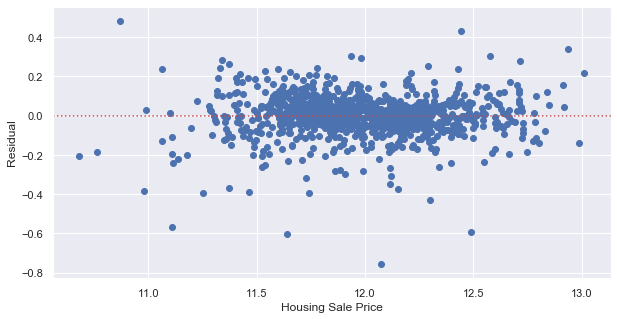

In [176]:
# Residual v/s predictions plot

plt.figure(figsize = (10,5))
plt.scatter( y_pred , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Housing Sale Price")
plt.ylabel("Residual")
plt.show()

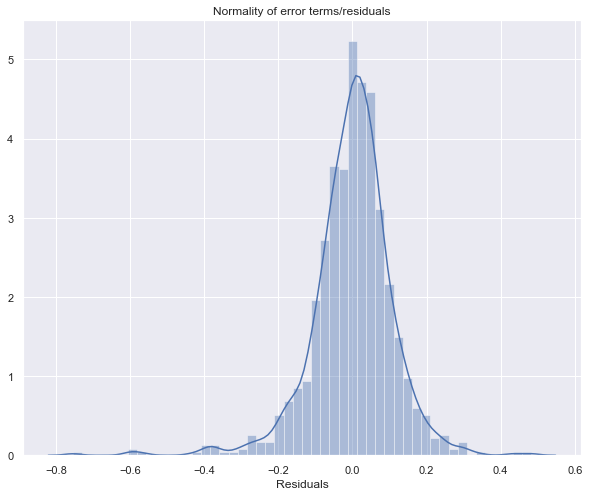

In [177]:
# Distribution of errors

plt.figure(figsize = (10,8))

p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')

plt.xlabel("Residuals")
plt.show()

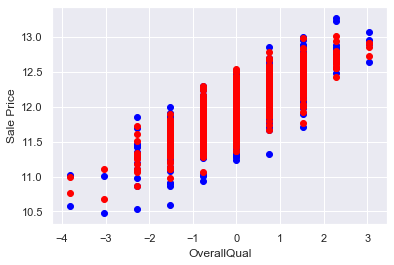

In [178]:
# Visual comparison between predicted and actual values

plt.scatter( X_train['OverallQual'] , y_train , color = 'blue') # actual values
plt.scatter( X_train['OverallQual'] , y_pred , color = 'red' ) # predicted values
plt.xlabel("OverallQual")
plt.ylabel("Sale Price")
plt.show()

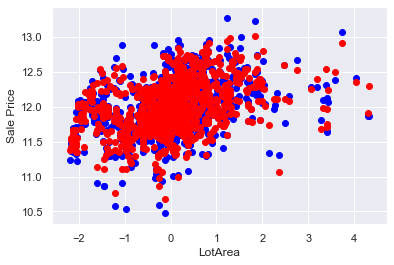

In [179]:
# Visual comparison between predicted and actual values
plt.scatter( X_train['LotArea'] , y_train , color = 'blue') 
plt.scatter( X_train['LotArea'] , y_pred , color = 'red')

plt.xlabel("LotArea")
plt.ylabel("Sale Price")

plt.show()

## 9. Ridge Regression

In [180]:
print(X_train.shape)
print(X_test.shape)

(950, 121)
(408, 121)


In [181]:
X_train.head()

,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition,Age,RemodAdd,Age_Garage,Property_age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Neighborhood_other,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_other,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_other,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep
1015,0.084516,-0.279126,-0.705899,-0.534805,-0.438955,0.715902,1.513970,0.344594,0.523718,-0.620288,-1.181293,-0.637338,0.57539,-1.205148,0.614446,-0.938398,-0.543960,-0.913579,-0.910227,1.223604,0.421462,1.206788,0.833500,1.267163,0.162545,-0.825326,-0.267279,-0.913235,-1.528469,0.368320,0.349925,-0.778093,0.053443,-0.386684,-0.994205,0.962797,-0.772271,-0.732948,-0.329421,-0.228142,-0.748288,-0.252646,-0.056284,-0.138972,-0.092155,-0.228142,2.047256,-0.230684,-0.206906,-0.092155,-0.117788,-0.204124,-0.215071,-0.113107,0.535969,-0.438144,-0.117788,-0.356269,-0.19558,-0.277664,-0.250279,-0.16099,-0.19266,-0.436436,4.592714,-0.146647,-0.209657,-0.301165,-0.233204,-0.212378,-0.250279,-0.146647,-0.299081,0.493412,-0.103142,-0.458466,-0.072739,0.0,-0.174266,-0.198462,-0.451725,-0.427859,-0.277664,-0.1223,1.348700,-0.39104,-0.1223,-0.065026,-0.1223,-0.198462,-0.431297,-0.065026,-0.417480,-0.331381,-0.12666,1.380289,-0.378419,-0.167745,-0.103142,-0.901652,1.157541,-0.117788,-0.045932,-0.045932,0.869487,-0.130884,-0.243076,-0.086158,-0.633388,-0.252646,-0.29277,-0.206906,-0.217736,-0.189702,-0.42958,-0.463502,-0.282038,-0.398167,4.242641,-0.250279,-0.225577
617,-0.486390,-0.602442,-0.705899,0.757980,-0.438955,0.208360,-0.006402,0.344594,0.523718,-0.620288,0.649422,0.542917,0.57539,1.167190,-1.003241,0.618362,-0.484643,0.123339,-0.845625,-0.802726,-1.332866,-0.787036,-1.003681,-0.735840,-1.043843,-0.825326,-1.536855,-0.913235,0.742126,0.368320,0.349925,-0.778093,-0.752731,-0.386684,0.544486,0.962797,0.749678,1.505960,-0.329421,-0.228142,-0.748288,-0.252646,-0.056284,-0.138972,-0.092155,-0.228142,-0.488459,-0.230684,-0.206906,-0.092155,-0.117788,-0.204124,-0.215071,-0.113107,0.535969,-0.438144,-0.117788,-0.356269,-0.19558,-0.277664,-0.250279,-0.16099,-0.19266,2.291288,-0.217736,-0.146647,-0.209657,-0.301

In [182]:
# list pf alphas

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 
                    0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [183]:
X_test[num_col] = scale(X_test[num_col])

In [184]:
from sklearn.metrics import r2_score

lambdas = [0.00001,0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 
                    0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000] 

for i in lambdas:
    ridgereg = Ridge(alpha=i)
    ridgereg.fit(X_train,y_train)
    
    y_pred = ridgereg.predict(X_train)
    
    print('Lambdas: ',i)
    print(r2_score(y_train,y_pred))
        
    y_predt = ridgereg.predict(X_test)
    
    print(r2_score(y_test,y_predt))
    print(ridgereg.coef_, '\n')


Lambdas:  1e-05
0.9214883641119074
0.8935581141327943
[ 0.00528184  0.02443958 -0.0006196  -0.0013454  -0.01503145  0.00725231
  0.07514547  0.04713181  0.00879239  0.00614195  0.00358528 -0.00500412
 -0.01122107 -0.00857133  0.00537751 -0.01946835  0.05522353 -0.02005825
 -0.01931842 -0.03203281  0.14337812  0.00872939  0.01182387  0.01237559
 -0.00856982 -0.01045541  0.00687459  0.01185892 -0.0039597   0.02719774
  0.00741083  0.00738604  0.00765616  0.0044639  -0.06639668  0.00787794
 -0.0106298  -0.0149536   0.01546903  0.00315002  0.02034201  0.0154494
  0.00094563  0.00698334  0.00401624  0.01818473  0.01111551 -0.0062227
  0.00166936 -0.00166135  0.00252258  0.0009312   0.12887798  0.06161364
  0.23579698  0.18967157 -0.00694022 -0.02592493  0.01145772 -0.02578688
 -0.02489365  0.00088781 -0.02227905 -0.02932669 -0.02203407 -0.01097442
 -0.00500841 -0.01872686 -0.01986138 -0.02161865 -0.02053209 -0.01168954
 -0.01695694  0.04018389  0.00718603  0.04174796  0.01163062  0.
  0.022

Lambdas:  5.0
0.9202783667902964
0.904358015004708
[ 5.11316515e-03  2.26981996e-02  4.44200093e-05 -1.27833352e-03
 -1.64483054e-02  8.75438199e-03  7.66758110e-02  4.82993956e-02
  8.85733090e-03  5.10264824e-03  1.78014495e-03 -4.96518331e-03
 -1.01695195e-02 -8.85802148e-03  7.39581233e-03 -1.77167188e-02
  5.35913464e-02 -2.00987804e-02  2.20009910e-02  1.66557142e-02
  8.60314015e-02  8.43570973e-03  1.24168343e-02  1.37450838e-02
 -6.90114169e-03 -1.06772103e-02  8.15841097e-03  1.26732602e-02
 -4.62062002e-03  2.54503357e-02  6.61270570e-03  7.97860758e-03
  7.87860178e-03  4.22671373e-03 -6.16745353e-02  8.69686282e-03
 -1.08544476e-02 -1.49232940e-02  1.03692591e-02  3.17084675e-04
  9.72627142e-03  1.09750279e-02  6.50615270e-04  4.64961545e-03
  3.93629478e-03  1.29543262e-02  1.55193388e-03 -1.19404446e-02
 -2.65493038e-03 -3.57421487e-03 -1.33547218e-04 -3.75672027e-03
  8.29244005e-02  3.75573550e-02  1.46876943e-01  1.16759447e-01
 -4.31550911e-03 -1.73948241e-02  1.484

In [185]:
pd.DataFrame(ridge_model_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005586,0.001353,0.001596,4.892407e-04,1e-05,{'alpha': 1e-05},-0.091236,-0.084027,-0.086859,-0.099295,-0.082552,-0.088794,0.006028,26,-0.072666,-0.075272,-0.073451,-0.069569,-0.073571,-0.072906,0.001872
1,0.004790,0.000751,0.001593,4.912060e-04,0.0001,{'alpha': 0.0001},-0.091236,-0.084027,-0.086859,-0.099295,-0.082552,-0.088794,0.006028,25,-0.072666,-0.075272,-0.073451,-0.069569,-0.073571,-0.072906,0.001872
2,0.003594,0.000489,0.001193,3.995397e-04,0.001,{'alpha': 0.001},-0.091236,-0.084025,-0.086858,-0.099294,-0.082551,-0.088793,0.006028,24,-0.072666,-0.075272,-0.073451,-0.069569,-0.073571,-0.072906,0.001872
3,0.002594,0.000490,0.001594,4.891713e-04,0.01,{'alpha': 0.01},-0.091238,-0.084009,-0.086855,-0.099285,-0.082545,-0.088786,0.006029,23,-0.072667,-0.075270,-0.073451,-0.069571,-0.073573,-0.072906,0.001871
4,0.003590,0.000797,0.000997,5.840039e-07,0.1,{'alpha': 0.1},-0.091257,-0.083854,-0.086824,-0.099210,-0.082487,-0.088726,0.006043,22,-0.072683,-0.075250,-0.073453,-0.069584,-0.073594,-0.072913,0.001863
5,0.004695,0.001173,0.001193,4.002155e-04,0.2,{'alpha': 0.2},-0.091278,-0.083695,-0.086802,-0.099191,-0.082427,-0.088679,0.006078,21,-0.072700,-0.075232,-0.073459,-0.069597,-0.073617,-0.072921,0.001855
6,0.003590,0.000797,0.001198,4.003766e-04,0.3,{'alpha': 0.3},-0.091297,-0.083554,-0.086790,-0.099173,-0.082370,-0.088637,0.006109,20,-0.072716,-0.075217,-0.073466,-0.069612,-0.073641,-0.072930,0.001848
7,0.003791,0.000975,0.000997,2.941741e-06,0.4,{'alpha': 0.4},-0.091316,-0.083425,-0.086786,-0.099156,-0.082319,-0.088600,0.006138,19,-0.072731,-0.075206,-0.073472,-0.069626,-0.073668,-0.072941,0.001842
8,0.003294,0.000399,0.001597,4.852946e-04,0.5,{'alpha': 0.5},-0.091333,-0.083304,-0.086787,-0.099140,-0.082273,-0.088567,0.006163,18,-0.072746,-0.075197,-0.073480,-0.069640,-0.073694,-0.072951,0.001837
9,0.003391,0.000488,0.001399,4.884701e-04,0.6,{'alpha': 0.6},-0.091349,-0.083193,-0.086792,-0.099125,-0.082229,-0.088537,0.006187,17,-0.072761,-0.075199,-0.073493,-0.069656,-0.073720,-0.072966,0.001835


In [186]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)

ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=1000]

ridge_cv_results[['param_alpha', 'mean_train_score',
                  'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
15,3,-0.073365,-0.088299,1
16,4,-0.073517,-0.088315,2
17,5,-0.073651,-0.088316,3
18,6,-0.073772,-0.088321,4
14,2,-0.073201,-0.088321,5
19,7,-0.073882,-0.088326,6
20,8,-0.073985,-0.088340,7
21,9,-0.074080,-0.088348,8
22,10,-0.074171,-0.088350,9
23,20,-0.074847,-0.088362,10


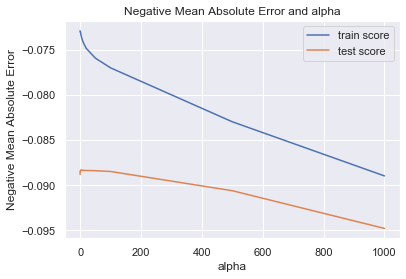

In [187]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])

plt.xlabel('alpha')

plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")

plt.legend(['train score', 'test score'], loc='upper right')

plt.show()

In [188]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [189]:
# check the coefficient values with lambda = 3.0

alpha = 3.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

ridge.coef_

array([ 5.16036734e-03,  2.32749612e-02, -1.24652566e-04, -1.30325545e-03,
       -1.61081983e-02,  8.44936766e-03,  7.63200292e-02,  4.80055403e-02,
        8.88259006e-03,  5.39504095e-03,  2.37134716e-03, -4.91290433e-03,
       -1.04192310e-02, -8.75506484e-03,  6.58066266e-03, -1.85112423e-02,
        5.43512221e-02, -2.00609763e-02,  1.43614274e-02,  8.08769697e-03,
        9.67688469e-02,  8.52036755e-03,  1.21087010e-02,  1.32861552e-02,
       -7.44317399e-03, -1.05159268e-02,  7.89084131e-03,  1.23967692e-02,
       -4.45569303e-03,  2.59989785e-02,  6.69891161e-03,  7.79255153e-03,
        7.85389447e-03,  4.28042633e-03, -6.32631244e-02,  8.47115474e-03,
       -1.10377551e-02, -1.49213231e-02,  1.16206715e-02,  1.04073830e-03,
        1.22876415e-02,  1.20386084e-02,  7.83254347e-04,  5.22202164e-03,
        4.06989665e-03,  1.42572316e-02,  3.66037126e-03, -1.05840958e-02,
       -1.66829766e-03, -3.12724307e-03,  4.80509287e-04, -2.68693874e-03,
        9.61870466e-02,  

In [190]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.013338796715557462

In [191]:
from sklearn import metrics

metrics.r2_score(y_test, ridge.predict(X_test))

0.9020502031114246

In [192]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})

ridge_df.reset_index(drop=True, inplace=True)

ridge_df

,Features,Coefficient
0,LotFrontage,0.0052
1,LotArea,0.0233
2,LotShape,-0.0001
3,LotConfig,-0.0013
4,BldgType,-0.0161
5,HouseStyle,0.0084
6,OverallQual,0.0763
7,OverallCond,0.0480
8,MasVnrType,0.0089
9,MasVnrArea,0.0054


In [193]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotFrontage': 0.0052,
 'LotArea': 0.0233,
 'LotShape': -0.0001,
 'LotConfig': -0.0013,
 'BldgType': -0.0161,
 'HouseStyle': 0.0084,
 'OverallQual': 0.0763,
 'OverallCond': 0.048,
 'MasVnrType': 0.0089,
 'MasVnrArea': 0.0054,
 'ExterQual': 0.0024,
 'BsmtQual': -0.0049,
 'BsmtExposure': -0.0104,
 'BsmtFinType1': -0.0088,
 'BsmtFinSF1': 0.0066,
 'BsmtUnfSF': -0.0185,
 'TotalBsmtSF': 0.0544,
 'HeatingQC': -0.0201,
 '1stFlrSF': 0.0144,
 '2ndFlrSF': 0.0081,
 'GrLivArea': 0.0968,
 'BsmtFullBath': 0.0085,
 'FullBath': 0.0121,
 'HalfBath': 0.0133,
 'BedroomAbvGr': -0.0074,
 'KitchenQual': -0.0105,
 'TotRmsAbvGrd': 0.0079,
 'Fireplaces': 0.0124,
 'GarageFinish': -0.0045,
 'GarageCars': 0.026,
 'GarageArea': 0.0067,
 'WoodDeckSF': 0.0078,
 'OpenPorchSF': 0.0079,
 'SaleCondition': 0.0043,
 'Age': -0.0633,
 'RemodAdd': 0.0085,
 'Age_Garage': -0.011,
 'Property_age': -0.0149,
 'MSSubClass_1-1/2 STORY FINISHED ALL AGES': 0.0116,
 'MSSubClass_1-STORY 1945 & OLDER': 0.001,
 'MSSubClass_1-STORY 1946 &

### RFE

In [194]:
# Do an RFE to minimise the features to 15

X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()

lm.fit(X_train_ridge, y_train)

# running RFE

rfe = RFE(lm, 15)

rfe = rfe.fit(X_train_ridge, y_train)

rfe

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [195]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), 
                        columns=['Features', 'rfe_support', 'rfe_ranking'])

temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]

temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)

temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)

temp1_df = temp1_df.head(10)

temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
12,MSZoning_RL,True,1,0.1724
13,MSZoning_RM,True,1,0.1377
6,GrLivArea,True,1,0.0968
10,MSZoning_FV,True,1,0.0962
1,OverallQual,True,1,0.0763
4,TotalBsmtSF,True,1,0.0544
2,OverallCond,True,1,0.0480
11,MSZoning_RH,True,1,0.0445
7,GarageCars,True,1,0.0260
14,Neighborhood_Crawfor,True,1,0.0138


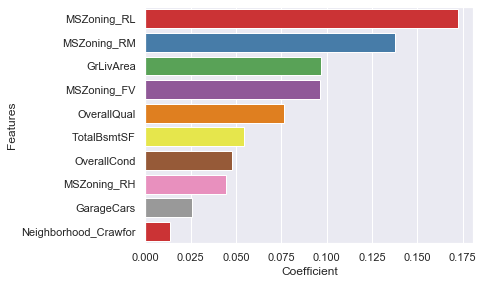

In [196]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

## 10. Lasso

In [197]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [198]:
lambdas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01] # Higher the value of lambda,

for i in lambdas:
    lassoreg = Lasso(alpha=i)
    lassoreg.fit(X_train,y_train)

    y_pred = lassoreg.predict(X_train)
    
    print('Lambdas: ',i)
    print(r2_score(y_train,y_pred))
        
    y_predt = lassoreg.predict(X_test)
    
    print(r2_score(y_test,y_predt))
    print(lassoreg.coef_,'\n')

Lambdas:  0.0001
0.9212654907478378
0.8977910245034175
[ 5.28955753e-03  2.35158314e-02 -1.35890401e-04 -1.14635322e-03
 -1.55720877e-02  6.14087469e-03  7.55770417e-02  4.74239479e-02
  8.53374136e-03  5.53175911e-03  2.68982588e-03 -4.50924455e-03
 -1.09930103e-02 -8.70637864e-03  6.36997481e-03 -1.82704196e-02
  5.40634589e-02 -1.99444919e-02  0.00000000e+00 -6.09966103e-03
  1.17875517e-01  8.56568292e-03  1.03626551e-02  1.20890162e-02
 -7.80076345e-03 -9.78259159e-03  6.37069869e-03  1.21024253e-02
 -4.67071635e-03  2.66573271e-02  7.13235995e-03  7.53138322e-03
  7.73963940e-03  4.40876257e-03 -6.53137528e-02  7.96437631e-03
 -1.08460146e-02 -1.51709195e-02  8.75141320e-03 -6.25044017e-04
  8.42071272e-03  9.60244553e-03  7.56762495e-06  3.92301866e-03
  2.49906362e-03  1.25102592e-02  1.66179479e-04 -1.25960529e-02
 -3.07862012e-03 -3.50850619e-03  8.49861412e-05 -3.02644704e-03
  1.17861558e-01  5.55754321e-02  2.15064249e-01  1.73918066e-01
 -4.68599360e-03 -1.84825983e-02  1

Lambdas:  0.002
0.9103863316050901
0.9073308344721023
[ 3.28924805e-03  1.57141166e-02  0.00000000e+00 -0.00000000e+00
 -4.93910970e-03 -0.00000000e+00  8.59994247e-02  5.05547070e-02
  4.96679234e-03  1.06653473e-04 -3.46591444e-03 -0.00000000e+00
 -9.91580392e-03 -8.14620898e-03  2.22367959e-02 -2.29252721e-03
  4.25414652e-02 -2.01134957e-02  6.24738110e-03  0.00000000e+00
  1.14186386e-01  5.46448884e-03  6.39189306e-03  9.92255940e-03
 -0.00000000e+00 -1.23361738e-02  0.00000000e+00  1.32955557e-02
 -5.50280429e-03  2.36517527e-02  1.02500302e-02  8.55545375e-03
  5.61898447e-03  3.39177335e-03 -6.07589454e-02  4.49260604e-03
 -0.00000000e+00 -1.10536071e-02  0.00000000e+00 -4.49606199e-03
  0.00000000e+00  0.00000000e+00 -3.20981727e-05  0.00000000e+00
 -0.00000000e+00  1.93372251e-03 -0.00000000e+00 -1.70307619e-02
 -6.36143690e-03 -1.67273338e-03  0.00000000e+00 -0.00000000e+00
  1.60762955e-02  0.00000000e+00  1.57045619e-02  0.00000000e+00
  8.27406754e-05  0.00000000e+00  2.

In [199]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)

lasso_cv_results[['param_alpha', 'mean_train_score', 
                  'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
9,0.005,-0.079518,-0.085585,1
8,0.004,-0.078661,-0.085704,2
7,0.003,-0.077814,-0.086326,3
4,0.0005,-0.073954,-0.087194,4
3,0.0004,-0.073717,-0.087281,5
6,0.002,-0.076937,-0.087288,6
5,0.001,-0.075025,-0.087404,7
2,0.0003,-0.073449,-0.087423,8
10,0.01,-0.083697,-0.087454,9
1,0.0002,-0.073196,-0.087678,10


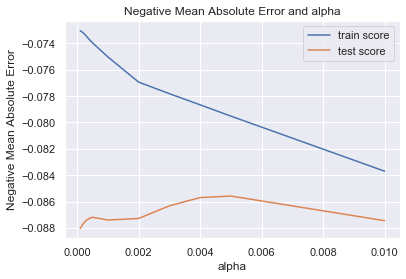

In [200]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])

plt.xlabel('alpha')

plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")

plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [201]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [202]:
# check the coefficient values with lambda = 0.005

alpha = 0.005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 1.36893951e-03,  1.43932387e-02,  0.00000000e+00,  0.00000000e+00,
       -4.62628796e-03, -0.00000000e+00,  8.87964871e-02,  4.59297384e-02,
        1.32322658e-03,  0.00000000e+00, -6.53995837e-03, -0.00000000e+00,
       -8.32163201e-03, -6.44350254e-03,  2.55501541e-02, -0.00000000e+00,
        4.20872043e-02, -1.97689747e-02,  1.83738053e-03,  0.00000000e+00,
        1.15728875e-01,  2.02073637e-03,  1.74938932e-03,  5.39713016e-03,
        0.00000000e+00, -1.43617053e-02,  0.00000000e+00,  1.35660241e-02,
       -8.05790386e-03,  2.37295583e-02,  1.47974744e-02,  7.12234886e-03,
        3.92751448e-03,  6.87586532e-04, -5.92963330e-02,  0.00000000e+00,
       -0.00000000e+00, -1.06837066e-02, -0.00000000e+00, -3.69481681e-03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.15906796e-02,
       -3.11199875e-03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.40569571e-02, -

In [203]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.012855901171416474

In [204]:
metrics.r2_score(y_test, lasso.predict(X_test))

0.9055962141554224

In [205]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})

lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]

lasso_df.reset_index(drop=True, inplace=True)

lasso_df

,Features,Coefficient
0,LotFrontage,0.0014
1,LotArea,0.0144
2,BldgType,-0.0046
3,OverallQual,0.0888
4,OverallCond,0.0459
5,MasVnrType,0.0013
6,ExterQual,-0.0065
7,BsmtExposure,-0.0083
8,BsmtFinType1,-0.0064
9,BsmtFinSF1,0.0256


In [206]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))

lasso_coeff_dict

{'LotFrontage': 0.0013689395082849892,
 'LotArea': 0.014393238711448287,
 'LotShape': 0.0,
 'LotConfig': 0.0,
 'BldgType': -0.004626287961179511,
 'HouseStyle': -0.0,
 'OverallQual': 0.0887964870568971,
 'OverallCond': 0.04592973837031897,
 'MasVnrType': 0.001323226583703185,
 'MasVnrArea': 0.0,
 'ExterQual': -0.006539958369040075,
 'BsmtQual': -0.0,
 'BsmtExposure': -0.008321632013417133,
 'BsmtFinType1': -0.006443502542109825,
 'BsmtFinSF1': 0.02555015410453055,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.042087204308664306,
 'HeatingQC': -0.019768974681560286,
 '1stFlrSF': 0.0018373805307749633,
 '2ndFlrSF': 0.0,
 'GrLivArea': 0.11572887515882033,
 'BsmtFullBath': 0.0020207363693208573,
 'FullBath': 0.0017493893188805032,
 'HalfBath': 0.005397130159371982,
 'BedroomAbvGr': 0.0,
 'KitchenQual': -0.014361705336502415,
 'TotRmsAbvGrd': 0.0,
 'Fireplaces': 0.013566024065580898,
 'GarageFinish': -0.008057903864011347,
 'GarageCars': 0.023729558305388185,
 'GarageArea': 0.014797474441536949,
 '

### RFE

In [207]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()

lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15) 

rfe = rfe.fit(X_train_lasso, y_train)

rfe

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [208]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), 
                        columns=['Features', 'rfe_support', 'rfe_ranking'])

temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]

temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)

temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)

temp2_df = temp2_df.head(10)

temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.115729
0,OverallQual,True,1,0.088796
1,OverallCond,True,1,0.045930
3,TotalBsmtSF,True,1,0.042087
2,BsmtFinSF1,True,1,0.025550
8,GarageCars,True,1,0.023730
13,Neighborhood_Crawfor,True,1,0.020176
12,MSZoning_RL,True,1,0.017493
11,MSZoning_FV,True,1,0.014057
7,Fireplaces,True,1,0.013566


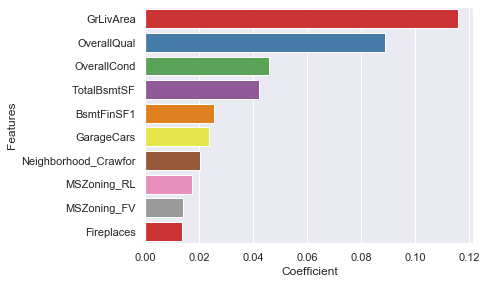

In [209]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

## Conclusion :

- The optimal lambda value in case of Ridge and Lasso is as below:
    - Ridge - 3.0
    - Lasso - 0.005
    
- The Mean Squared error in case of Ridge and Lasso are:
    - Ridge - 0.1333
    - Lasso - 0.01285
    
- R-squared value in case of Ridge and Lasso are:
    - Ridge - 0.9020
    - Lasso - 0.9055

- The Mean Squared Error of Lasso is slightly lower than that of Ridge.

- Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a 
  better edge over Ridge.
  
- Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area
  square feet, Overall quality and condition of the house, Foundation type of the house, Number of cars that can be 
  accomodated in the garage, Total basement area in square feet and the Basement finished square feet area.
    
Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the 
price of a house.